__author__ = 'Armando Collado-Villaverde'  
__email__ = 'armando.collado@uah.es'

# Graphs y metrics for the Operational SYM-H forecasting with confidence intervals using Deep Neural Networks paper

## Index

1. [Imports and Data Loading](#Imports-and-Data-Loading)<br>
2. [Metrics for the old model](#metrics-old-model)<br>
    2.1 [Test storms 1h](#test-1h-old)<br>
    2.2 [Test key storms 1h](#test-key-1h-old)<br>
    2.3 [Test storms 2h](#test-2h-old)<br>
    2.4 [Test key storms 2h](#test-key-2h-old)<br>
3. [Metrics for the new model](#metrics-new-model)<br>
    3.1 [Test storms 1h](#test-1h-new)<br>
    3.2 [Test key storms 1h](#test-key-1h-new)<br>
    3.3 [Test storms 2h](#test-2h-new)<br>
    3.4 [Test key storms 2h](#test-key-2h-new)<br>
4. [Comparisons](#comparisons)<br>
    4.1 [Comparisons 1h vs 2h](#comparisons-1h-2h)<br>
5. [Supporting information plots](#si-plots)<br>

For each storm in the test and test key datasets, calculate the RMSE, BFE and R2 for both the old model and the one including quantile forecasts that has been trained on the new subset. For the quantile model also the percentage coverage of the prediction interval, the mean interval width and the binned interval width are also calculated.

For the new model also save to images the forecast, BFE and interval width plots for each individual storm, for the global storms and the BFE comparison of the global storms for both models

## Imports and Data Loading
<a id='Imports-and-Data-Loading'>

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import storm_dates
import shutil
import matplotlib.image as mpimg

In [2]:
# Columns in the summary dataframe of the old split
summary_columns_noq = [
    "StormIndex",
    "BFE_old",
    "RMSE_old",
    "R2_old",
]

# Columns in the summary dataframe of the new split with quantiles
summary_columns = [
    "StormIndex",
    "BFE",
    "RMSE",
    "R2",
    'pct_inside_90',
    'interval_width_mean_90',
    'binned_interval_width_90'
]

In [3]:
# Read predictions for the old model
preds_prev_split_test_1h = pd.read_csv(
    'predictions/old_split_model_1h_sym_test.csv', parse_dates = ['datetime'], index_col = 'datetime')
preds_prev_split_test_key_1h = pd.read_csv(
    'predictions/old_split_model_1h_sym_test_key.csv', parse_dates = ['datetime'], index_col = 'datetime')
preds_prev_split_test_2h = pd.read_csv(
    'predictions/old_split_model_2h_sym_test.csv', parse_dates = ['datetime'], index_col = 'datetime')
preds_prev_split_test_key_2h = pd.read_csv(
    'predictions/old_split_model_2h_sym_test_key.csv', parse_dates = ['datetime'], index_col = 'datetime')

# Read predictions for the new model
preds_new_split_test_1h = pd.read_csv(
    'predictions/new_split_model_1h_sym_test_quantiles.csv', parse_dates = ['datetime'], index_col = 'datetime')
preds_new_split_test_key_1h = pd.read_csv(
    'predictions/new_split_model_1h_sym_test_key_quantiles.csv', parse_dates = ['datetime'], index_col = 'datetime')
preds_new_split_test_2h = pd.read_csv(
    'predictions/new_split_model_2h_sym_test_quantiles.csv', parse_dates = ['datetime'], index_col = 'datetime')
preds_new_split_test_key_2h = pd.read_csv(
    'predictions/new_split_model_2h_sym_test_key_quantiles.csv', parse_dates = ['datetime'], index_col = 'datetime')

## Metrics for the old model
<a id='metrics-old-model'>

### Test storms 1 hour ahead
<a id='test-1h-old'>

Test storms 1h ahead


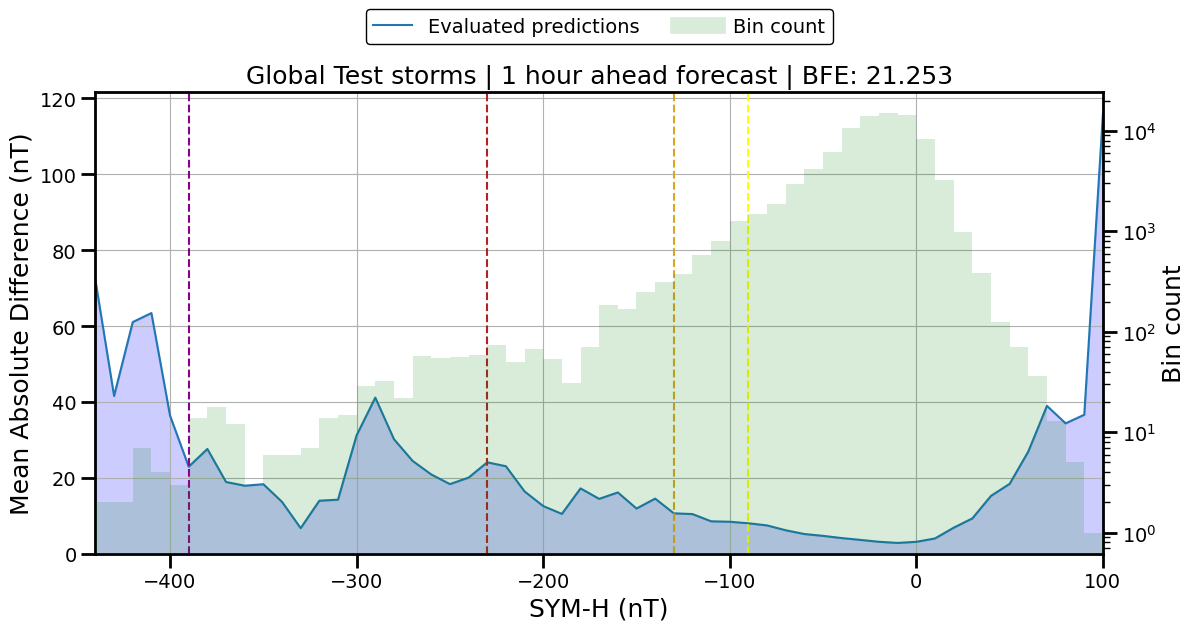

Metrics summary


,StormIndex,BFE_old,RMSE_old,R2_old
0,81,7.889,5.389,0.928
1,82,15.126,8.788,0.951
2,83,6.246,6.316,0.950
3,84,9.597,8.175,0.948
4,85,5.848,4.800,0.964
5,86,4.013,4.621,0.968
6,87,7.217,5.380,0.948
7,88,4.118,4.916,0.965
8,89,12.214,7.473,0.982
9,90,8.797,6.224,0.960


\begin{tabular}{lrrr}
\toprule
StormIndex &  BFE\_old &  RMSE\_old &  R2\_old \\
\midrule
        81 &    7.889 &     5.389 &   0.928 \\
        82 &   15.126 &     8.788 &   0.951 \\
        83 &    6.246 &     6.316 &   0.950 \\
        84 &    9.597 &     8.175 &   0.948 \\
        85 &    5.848 &     4.800 &   0.964 \\
        86 &    4.013 &     4.621 &   0.968 \\
        87 &    7.217 &     5.380 &   0.948 \\
        88 &    4.118 &     4.916 &   0.965 \\
        89 &   12.214 &     7.473 &   0.982 \\
        90 &    8.797 &     6.224 &   0.960 \\
        91 &   28.137 &    14.347 &   0.968 \\
        92 &   13.023 &     7.360 &   0.899 \\
        93 &    6.073 &     5.727 &   0.939 \\
        94 &    6.415 &     5.083 &   0.962 \\
        95 &    7.906 &     6.371 &   0.969 \\
        96 &   12.323 &    10.054 &   0.808 \\
        97 &    9.987 &     7.119 &   0.930 \\
        98 &    7.772 &     6.569 &   0.920 \\
        99 &   10.299 &     8.174 &   0.908 \\
       100 &    5

In [4]:
print('Test storms 1h ahead')
all_predictions_dfs = []
storm_bfes = []
storm_rmses = []
storm_r2s = []
dfs_global = []

hours = 1

summary_df = None
    
for sd, ed, storm_index in storm_dates.TEST_STORMS_INFO_SYM_H:
    start_date = pd.to_datetime(sd)
    end_date = pd.to_datetime(ed)
    df_eval = preds_prev_split_test_1h[start_date : end_date].copy()
    dfs_global.append(preds_prev_split_test_1h[start_date : end_date].copy())
    rmse = metrics.rmse(
        df_eval["SYM_H"],
        df_eval['predicted_SYM_H']        
    )
    storm_rmses.append(rmse)
    r2 = metrics.r2m(
        df_eval["SYM_H"],
        df_eval['predicted_SYM_H']        
    )
    storm_r2s.append(r2)
    bfe = metrics.calculate_BFE(
        df_eval["SYM_H"],
        df_eval['predicted_SYM_H']
    )
    storm_bfes.append(bfe)

    summary_df_data = [str(storm_index), bfe, rmse, r2]
    
    if summary_df is None:
        summary_df = pd.DataFrame([summary_df_data], columns = summary_columns_noq)
    else:
        summary_df = pd.concat([
            summary_df,
            pd.DataFrame(
                data = [summary_df_data],
                columns = summary_columns_noq
            )
        ])

data_for_means = ['Mean:']
for col in summary_df.columns[1:]:
    data_for_means.append(np.mean(summary_df[col]))
    
summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_means],
        columns = summary_columns_noq,
    )
], ignore_index = True)


df_global = pd.concat(dfs_global)

metrics.plot_evaluation_bfe(
    df_global[['SYM_H', 'predicted_SYM_H']],
    title = f'Global Test storms | 1 hour ahead forecast',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
)

plt.show();

rmse_global = metrics.rmse(df_global['SYM_H'], df_global['predicted_SYM_H'])
r2_global = metrics.r2m(df_global['SYM_H'], df_global['predicted_SYM_H'])
bfe_global = metrics.calculate_BFE(df_global['SYM_H'], df_global['predicted_SYM_H'])

data_for_global = ['Global:', bfe_global, rmse_global, r2_global]

summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_global],
        columns = summary_columns_noq,
    )
], ignore_index = True)

print('Metrics summary')
display(summary_df.round(3))
summary_old_test_1h = summary_df.copy()

print(summary_df[['StormIndex', 'BFE_old', 'RMSE_old', 'R2_old']].round(3).to_latex(index=False))
df_global_1h_test_prev = df_global.copy()

### Test key storms 1 hour ahead
<a id='test-key-1h-old'>

Test key storms 1h ahead


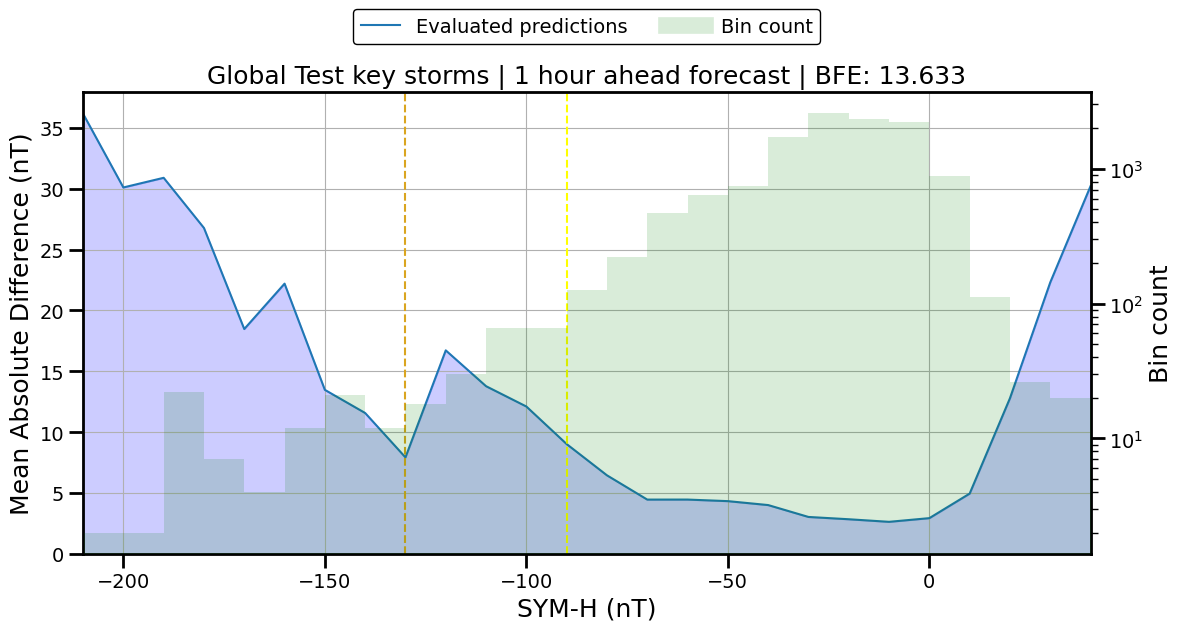

Metrics summary


,StormIndex,BFE_old,RMSE_old,R2_old
0,117,11.344,6.692,0.967
1,118,4.675,4.441,0.940
2,119,12.833,8.095,0.875
3,120,3.695,4.041,0.966
4,121,11.199,5.851,0.872
5,122,8.291,5.137,0.943
6,Mean:,8.673,5.709,0.927
7,Global:,13.633,5.873,0.944


\begin{tabular}{lrrr}
\toprule
StormIndex &  BFE\_old &  RMSE\_old &  R2\_old \\
\midrule
       117 &   11.344 &     6.692 &   0.967 \\
       118 &    4.675 &     4.441 &   0.940 \\
       119 &   12.833 &     8.095 &   0.875 \\
       120 &    3.695 &     4.041 &   0.966 \\
       121 &   11.199 &     5.851 &   0.872 \\
       122 &    8.291 &     5.137 &   0.943 \\
     Mean: &    8.673 &     5.709 &   0.927 \\
   Global: &   13.633 &     5.873 &   0.944 \\
\bottomrule
\end{tabular}



In [5]:
print('Test key storms 1h ahead')
all_predictions_dfs = []
storm_bfes = []
storm_rmses = []
storm_r2s = []
dfs_global = []

hours = 1

summary_df = None
    
for sd, ed, storm_index in storm_dates.TEST_KEY_STORMS_INFO_SYM_H:
    start_date = pd.to_datetime(sd)
    end_date = pd.to_datetime(ed)
    df_eval = preds_prev_split_test_key_1h[start_date : end_date].copy()
    dfs_global.append(preds_prev_split_test_key_1h[start_date : end_date].copy())
    rmse = metrics.rmse(
        df_eval["SYM_H"],
        df_eval['predicted_SYM_H']        
    )
    storm_rmses.append(rmse)
    r2 = metrics.r2m(
        df_eval["SYM_H"],
        df_eval['predicted_SYM_H']        
    )
    storm_r2s.append(r2)
    bfe = metrics.calculate_BFE(
        df_eval["SYM_H"],
        df_eval['predicted_SYM_H']
    )
    storm_bfes.append(bfe)

    summary_df_data = [str(storm_index), bfe, rmse, r2]
    
    if summary_df is None:
        summary_df = pd.DataFrame([summary_df_data], columns = summary_columns_noq)
    else:
        summary_df = pd.concat([
            summary_df,
            pd.DataFrame(
                data = [summary_df_data],
                columns = summary_columns_noq
            )
        ])

data_for_means = ['Mean:']
for col in summary_df.columns[1:]:
    data_for_means.append(np.mean(summary_df[col]))
    
summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_means],
        columns = summary_columns_noq,
    )
], ignore_index = True)


df_global = pd.concat(dfs_global)

metrics.plot_evaluation_bfe(
    df_global[['SYM_H', 'predicted_SYM_H']],
    title = f'Global Test key storms | 1 hour ahead forecast',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
)

plt.show();

rmse_global = metrics.rmse(df_global['SYM_H'], df_global['predicted_SYM_H'])
r2_global = metrics.r2m(df_global['SYM_H'], df_global['predicted_SYM_H'])
bfe_global = metrics.calculate_BFE(df_global['SYM_H'], df_global['predicted_SYM_H'])

data_for_global = ['Global:', bfe_global, rmse_global, r2_global]

summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_global],
        columns = summary_columns_noq,
    )
], ignore_index = True)

print('Metrics summary')
display(summary_df.round(3))
summary_old_test_key_1h = summary_df.copy()

print(summary_df[['StormIndex', 'BFE_old', 'RMSE_old', 'R2_old']].round(3).to_latex(index=False))
df_global_1h_test_key_prev = df_global.copy()

### Test storms 2h ahead
<a id='test-2h-old'>

Test storms 2h ahead


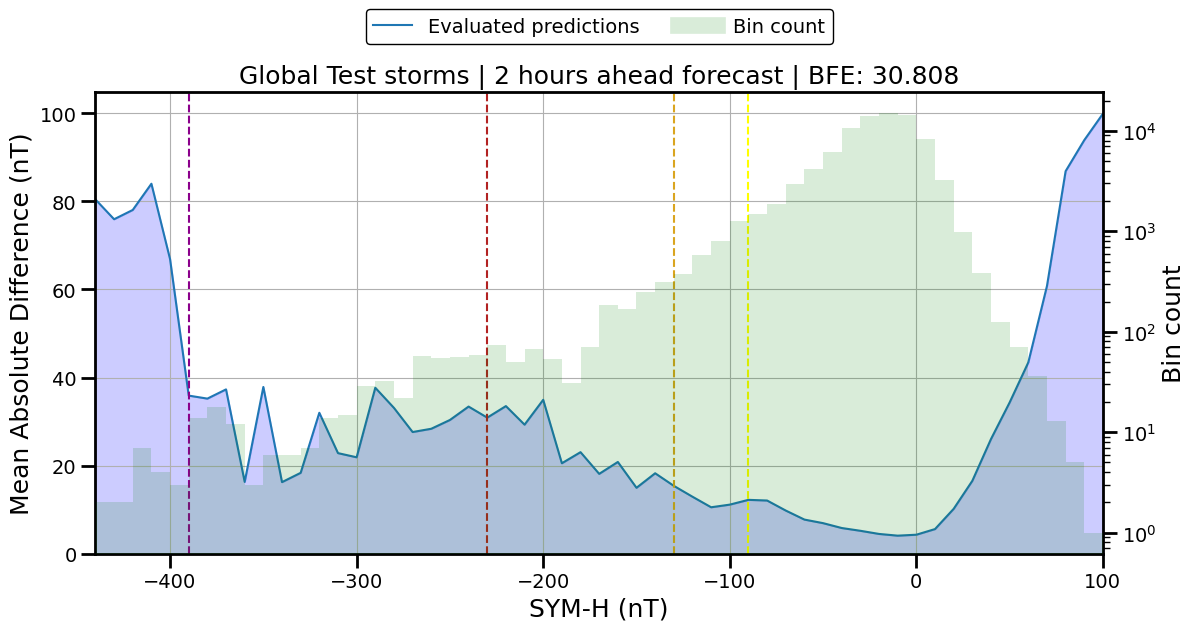

Metrics summary


,StormIndex,BFE_old,RMSE_old,R2_old
0,81,12.074,8.284,0.831
1,82,16.450,11.630,0.915
2,83,8.393,9.465,0.888
3,84,17.644,12.723,0.875
4,85,6.867,5.502,0.953
5,86,5.341,6.819,0.930
6,87,11.598,8.408,0.872
7,88,8.166,7.581,0.918
8,89,16.644,9.983,0.968
9,90,13.574,9.432,0.908


\begin{tabular}{lrrr}
\toprule
StormIndex &  BFE\_old &  RMSE\_old &  R2\_old \\
\midrule
        81 &   12.074 &     8.284 &   0.831 \\
        82 &   16.450 &    11.630 &   0.915 \\
        83 &    8.393 &     9.465 &   0.888 \\
        84 &   17.644 &    12.723 &   0.875 \\
        85 &    6.867 &     5.502 &   0.953 \\
        86 &    5.341 &     6.819 &   0.930 \\
        87 &   11.598 &     8.408 &   0.872 \\
        88 &    8.166 &     7.581 &   0.918 \\
        89 &   16.644 &     9.983 &   0.968 \\
        90 &   13.574 &     9.432 &   0.908 \\
        91 &   35.187 &    17.726 &   0.950 \\
        92 &   19.558 &    11.174 &   0.768 \\
        93 &    8.442 &     9.270 &   0.841 \\
        94 &    9.281 &     7.114 &   0.927 \\
        95 &   12.295 &     9.871 &   0.926 \\
        96 &   18.501 &    16.392 &   0.491 \\
        97 &   14.681 &    10.284 &   0.854 \\
        98 &   11.856 &     9.083 &   0.847 \\
        99 &   14.397 &    11.698 &   0.811 \\
       100 &    7

In [6]:
print('Test storms 2h ahead')
all_predictions_dfs = []
storm_bfes = []
storm_rmses = []
storm_r2s = []
dfs_global = []

hours = 2

summary_df = None
    
for sd, ed, storm_index in storm_dates.TEST_STORMS_INFO_SYM_H:
    start_date = pd.to_datetime(sd)
    end_date = pd.to_datetime(ed)
    df_eval = preds_prev_split_test_2h[start_date : end_date].copy()
    dfs_global.append(preds_prev_split_test_2h[start_date : end_date].copy())
    rmse = metrics.rmse(
        df_eval["SYM_H"],
        df_eval['predicted_SYM_H']        
    )
    storm_rmses.append(rmse)
    r2 = metrics.r2m(
        df_eval["SYM_H"],
        df_eval['predicted_SYM_H']        
    )
    storm_r2s.append(r2)
    bfe = metrics.calculate_BFE(
        df_eval["SYM_H"],
        df_eval['predicted_SYM_H']
    )
    storm_bfes.append(bfe)

    summary_df_data = [str(storm_index), bfe, rmse, r2]
    
    if summary_df is None:
        summary_df = pd.DataFrame([summary_df_data], columns = summary_columns_noq)
    else:
        summary_df = pd.concat([
            summary_df,
            pd.DataFrame(
                data = [summary_df_data],
                columns = summary_columns_noq
            )
        ])

data_for_means = ['Mean:']
for col in summary_df.columns[1:]:
    data_for_means.append(np.mean(summary_df[col]))
    
summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_means],
        columns = summary_columns_noq,
    )
], ignore_index = True)


df_global = pd.concat(dfs_global)

metrics.plot_evaluation_bfe(
    df_global[['SYM_H', 'predicted_SYM_H']],
    title = f'Global Test storms | 2 hours ahead forecast',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
)

plt.show();

rmse_global = metrics.rmse(df_global['SYM_H'], df_global['predicted_SYM_H'])
r2_global = metrics.r2m(df_global['SYM_H'], df_global['predicted_SYM_H'])
bfe_global = metrics.calculate_BFE(df_global['SYM_H'], df_global['predicted_SYM_H'])

data_for_global = ['Global:', bfe_global, rmse_global, r2_global]

summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_global],
        columns = summary_columns_noq,
    )
], ignore_index = True)

print('Metrics summary')
display(summary_df.round(3))
summary_old_test_2h = summary_df.copy()

print(summary_df[['StormIndex', 'BFE_old', 'RMSE_old', 'R2_old']].round(3).to_latex(index=False))
df_global_2h_test_prev = df_global.copy()

### Test key storms 2 hours ahead
<a id='test-key-2h-old'>

Test key storms 2h ahead


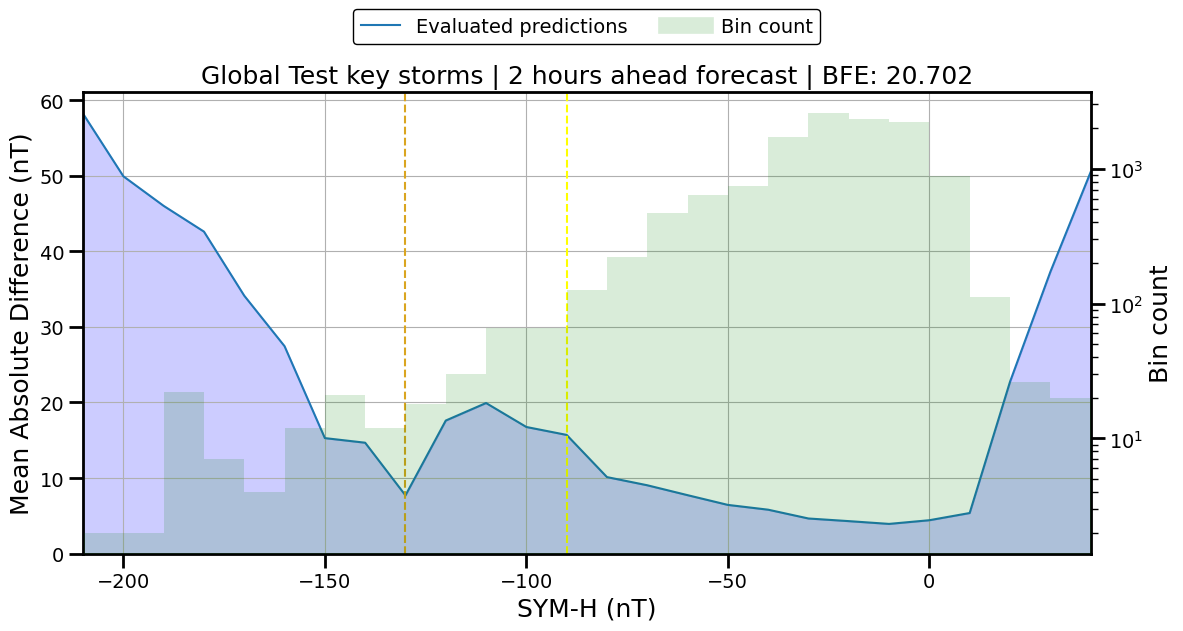

Metrics summary


,StormIndex,BFE_old,RMSE_old,R2_old
0,117,17.210,10.356,0.922
1,118,7.689,6.739,0.863
2,119,18.649,10.929,0.771
3,120,5.335,5.610,0.935
4,121,14.737,9.019,0.696
5,122,14.191,8.845,0.830
6,Mean:,12.969,8.583,0.836
7,Global:,20.702,8.791,0.876


\begin{tabular}{lrrr}
\toprule
StormIndex &  BFE\_old &  RMSE\_old &  R2\_old \\
\midrule
       117 &   17.210 &    10.356 &   0.922 \\
       118 &    7.689 &     6.739 &   0.863 \\
       119 &   18.649 &    10.929 &   0.771 \\
       120 &    5.335 &     5.610 &   0.935 \\
       121 &   14.737 &     9.019 &   0.696 \\
       122 &   14.191 &     8.845 &   0.830 \\
     Mean: &   12.969 &     8.583 &   0.836 \\
   Global: &   20.702 &     8.791 &   0.876 \\
\bottomrule
\end{tabular}



In [7]:
print('Test key storms 2h ahead')
all_predictions_dfs = []
storm_bfes = []
storm_rmses = []
storm_r2s = []
dfs_global = []

hours = 2

summary_df = None
    
for sd, ed, storm_index in storm_dates.TEST_KEY_STORMS_INFO_SYM_H:
    start_date = pd.to_datetime(sd)
    end_date = pd.to_datetime(ed)
    df_eval = preds_prev_split_test_key_2h[start_date : end_date].copy()
    dfs_global.append(preds_prev_split_test_key_2h[start_date : end_date].copy())
    rmse = metrics.rmse(
        df_eval["SYM_H"],
        df_eval['predicted_SYM_H']        
    )
    storm_rmses.append(rmse)
    r2 = metrics.r2m(
        df_eval["SYM_H"],
        df_eval['predicted_SYM_H']        
    )
    storm_r2s.append(r2)
    bfe = metrics.calculate_BFE(
        df_eval["SYM_H"],
        df_eval['predicted_SYM_H']
    )
    storm_bfes.append(bfe)

    summary_df_data = [str(storm_index), bfe, rmse, r2]
    
    if summary_df is None:
        summary_df = pd.DataFrame([summary_df_data], columns = summary_columns_noq)
    else:
        summary_df = pd.concat([
            summary_df,
            pd.DataFrame(
                data = [summary_df_data],
                columns = summary_columns_noq
            )
        ])

data_for_means = ['Mean:']
for col in summary_df.columns[1:]:
    data_for_means.append(np.mean(summary_df[col]))
    
summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_means],
        columns = summary_columns_noq,
    )
], ignore_index = True)


df_global = pd.concat(dfs_global)

metrics.plot_evaluation_bfe(
    df_global[['SYM_H', 'predicted_SYM_H']],
    title = f'Global Test key storms | 2 hours ahead forecast',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
)

plt.show();

rmse_global = metrics.rmse(df_global['SYM_H'], df_global['predicted_SYM_H'])
r2_global = metrics.r2m(df_global['SYM_H'], df_global['predicted_SYM_H'])
bfe_global = metrics.calculate_BFE(df_global['SYM_H'], df_global['predicted_SYM_H'])

data_for_global = ['Global:', bfe_global, rmse_global, r2_global]

summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_global],
        columns = summary_columns_noq,
    )
], ignore_index = True)

print('Metrics summary')
display(summary_df.round(3))
summary_old_test_key_2h = summary_df.copy()

print(summary_df[['StormIndex', 'BFE_old', 'RMSE_old', 'R2_old']].round(3).to_latex(index=False))
df_global_2h_test_key_prev = df_global.copy()

## Metrics for the new model
<a id='metrics-new-model'>

### Test storms 1 hour ahead
<a id='test-1h-new'>

Test storms 1h ahead


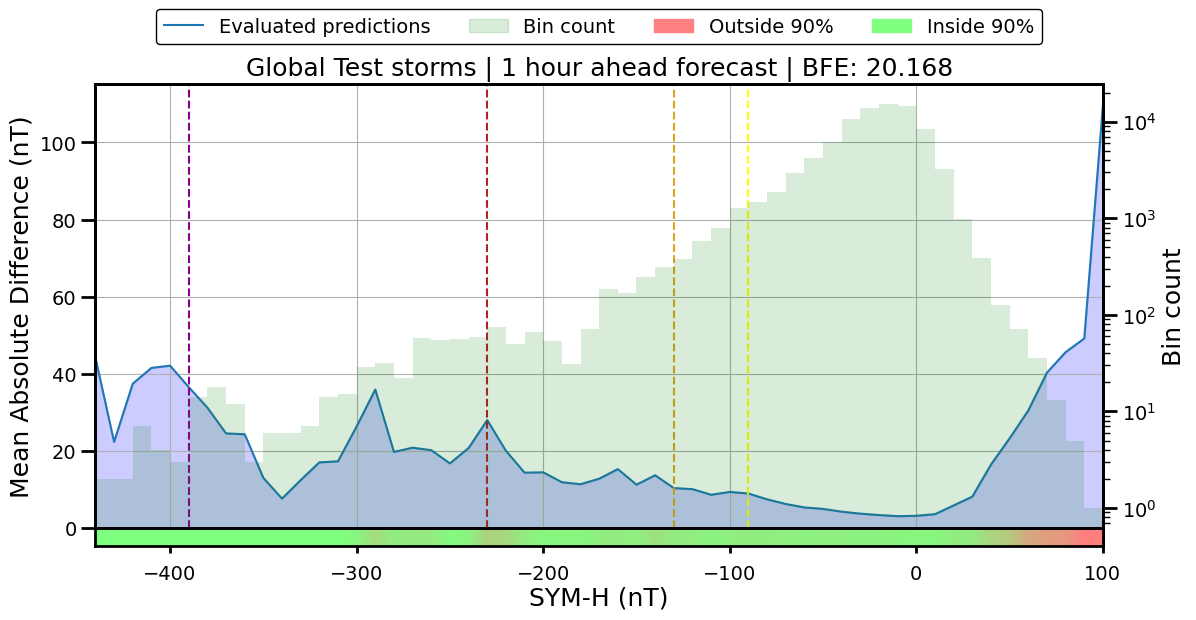

Metrics summary


,StormIndex,BFE,RMSE,R2,pct_inside_90,interval_width_mean_90,binned_interval_width_90
0,81,8.596,5.861,0.915,0.905,17.242,25.666
1,82,13.119,8.282,0.957,0.837,20.600,30.077
2,83,6.341,6.657,0.944,0.892,19.617,25.320
3,84,8.965,8.638,0.942,0.916,20.873,31.655
4,85,5.213,4.670,0.966,0.964,15.834,23.690
5,86,3.882,4.858,0.965,0.958,18.518,22.432
6,87,7.885,5.242,0.950,0.949,18.016,31.731
7,88,6.875,5.791,0.952,0.954,18.171,27.312
8,89,12.633,7.965,0.980,0.894,19.996,48.500
9,90,7.569,6.283,0.959,0.904,18.051,31.821


\begin{tabular}{lrrrrrr}
\toprule
StormIndex &    BFE &   RMSE &    R2 &  pct\_inside\_90 &  interval\_width\_mean\_90 &  binned\_interval\_width\_90 \\
\midrule
        81 &  8.596 &  5.861 & 0.915 &          0.905 &                  17.242 &                    25.666 \\
        82 & 13.119 &  8.282 & 0.957 &          0.837 &                  20.600 &                    30.077 \\
        83 &  6.341 &  6.657 & 0.944 &          0.892 &                  19.617 &                    25.320 \\
        84 &  8.965 &  8.638 & 0.942 &          0.916 &                  20.873 &                    31.655 \\
        85 &  5.213 &  4.670 & 0.966 &          0.964 &                  15.834 &                    23.690 \\
        86 &  3.882 &  4.858 & 0.965 &          0.958 &                  18.518 &                    22.432 \\
        87 &  7.885 &  5.242 & 0.950 &          0.949 &                  18.016 &                    31.731 \\
        88 &  6.875 &  5.791 & 0.952 &          0.954 &      

In [8]:
print('Test storms 1h ahead')
all_predictions_dfs = []
storm_bfes = []
storm_rmses = []
storm_r2s = []
pct_inside_90 = []
dfs_global = []

hours = 1

summary_df = None
    
for sd, ed, storm_index in storm_dates.TEST_STORMS_INFO_SYM_H:
    start_date = pd.to_datetime(sd)
    end_date = pd.to_datetime(ed)
    df_eval = preds_new_split_test_1h[start_date : end_date].copy()
    dfs_global.append(preds_new_split_test_1h[start_date : end_date].copy())
    metrics.plot_forecast_quantile(
        preds_new_split_test_1h[start_date : end_date][[
            'SYM_H', 'mse_predicted_SYM_H', 'q05_predicted_SYM_H', 'q95_predicted_SYM_H']],
        title = f'Test storm {storm_index} | From {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} | 1 hour ahead forecast',
        plot_sym_bars = True,
        plot_prediction_error = False,
        big_quantile_color = [31 / 255, 176 / 255, 255 / 255, 1],
    )

    plt.savefig(f'./figs/sym-h-{str(hours)}h-forecast-q-test-{storm_index}.png', bbox_inches='tight', transparent = True)

    plt.close();
    metrics.plot_evaluation_bfe_quantile(
        preds_new_split_test_1h[start_date : end_date][[
            'SYM_H', 'mse_predicted_SYM_H', 'inside_90%']],
        title = f'Test storm {storm_index} | From {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} | 1 hour ahead forecast',
        plot_sym_bars = True,
        xlabel_title = 'SYM-H (nT)',
    )

    plt.savefig(f'./figs/sym-h-{str(hours)}h-bfe-q-test-{storm_index}.png', bbox_inches='tight', transparent = True)

    plt.close();
    
    metrics.plot_evaluation_quantile(
        preds_new_split_test_1h[start_date : end_date][['SYM_H', 'q05_predicted_SYM_H', 'q95_predicted_SYM_H']],
        title = f'Test storm {storm_index} | From {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} | 1 hour ahead interval evaluation',
        plot_sym_bars = True,
        xlabel_title = 'SYM-H (nT)'
    );

    plt.savefig(f'./figs/sym-h-{str(hours)}h-interval-evaluation-test-{storm_index}.png', bbox_inches='tight', transparent = True)

    plt.close()
    
    rmse = metrics.rmse(
        df_eval["SYM_H"],
        df_eval['mse_predicted_SYM_H']        
    )
    storm_rmses.append(rmse)
    r2 = metrics.r2m(
        df_eval["SYM_H"],
        df_eval['mse_predicted_SYM_H']        
    )
    storm_r2s.append(r2)
    bfe = metrics.calculate_BFE(
        df_eval["SYM_H"],
        df_eval['mse_predicted_SYM_H']
    )
    storm_bfes.append(bfe)

    in_90 = int(df_eval.loc[df_eval['SYM_H'].idxmin(), 'inside_90%'])

    pct_inside_90_val, width_mean_90, biw_90 = metrics.calculate_interval_stats(        
        df_eval['SYM_H'],
        df_eval['q05_predicted_SYM_H'],
        df_eval['q95_predicted_SYM_H'],
    )
    pct_inside_90.append(pct_inside_90_val)
    
    summary_df_data = [str(storm_index), bfe, rmse, r2, pct_inside_90_val, width_mean_90, biw_90]
    
    if summary_df is None:
        summary_df = pd.DataFrame([summary_df_data], columns = summary_columns)
    else:
        summary_df = pd.concat([
            summary_df,
            pd.DataFrame(
                data = [summary_df_data],
                columns = summary_columns
            )
        ])

data_for_means = ['Mean:']
for col in summary_df.columns[1:]:
    data_for_means.append(np.mean(summary_df[col]))
    
summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_means],
        columns = summary_columns,
    )
], ignore_index = True)


df_global = pd.concat(dfs_global)

metrics.plot_evaluation_bfe_quantile(
    df_global[['SYM_H', 'mse_predicted_SYM_H', 'inside_90%']],
    title = f'Global Test storms | 1 hour ahead forecast',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
)

plt.savefig(f'./figs/sym-h-{str(hours)}h-bfe-q-global-test.png', bbox_inches='tight', transparent = True)

plt.show();

rmse_global = metrics.rmse(df_global['SYM_H'], df_global['mse_predicted_SYM_H'])
r2_global = metrics.r2m(df_global['SYM_H'], df_global['mse_predicted_SYM_H'])
bfe_global = metrics.calculate_BFE(df_global['SYM_H'], df_global['mse_predicted_SYM_H'])

inside_90_global, width_mean_global_90, biw_global_90 = metrics.calculate_interval_stats(        
    df_global['SYM_H'],
    df_global['q05_predicted_SYM_H'],
    df_global['q95_predicted_SYM_H'],
)
    
data_for_global = ['Global:', bfe_global, rmse_global, r2_global,
                    inside_90_global, width_mean_global_90, biw_global_90]

summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_global],
        columns = summary_columns,
    )
], ignore_index = True)

print('Metrics summary')
display(summary_df.round(3))
summary_new_test_1h = summary_df.copy()

df_global_1h_test_new = df_global.copy()

print(summary_df[['StormIndex', 'BFE', 'RMSE', 'R2', 'pct_inside_90', 'interval_width_mean_90', 'binned_interval_width_90']].round(3).to_latex(index=False))

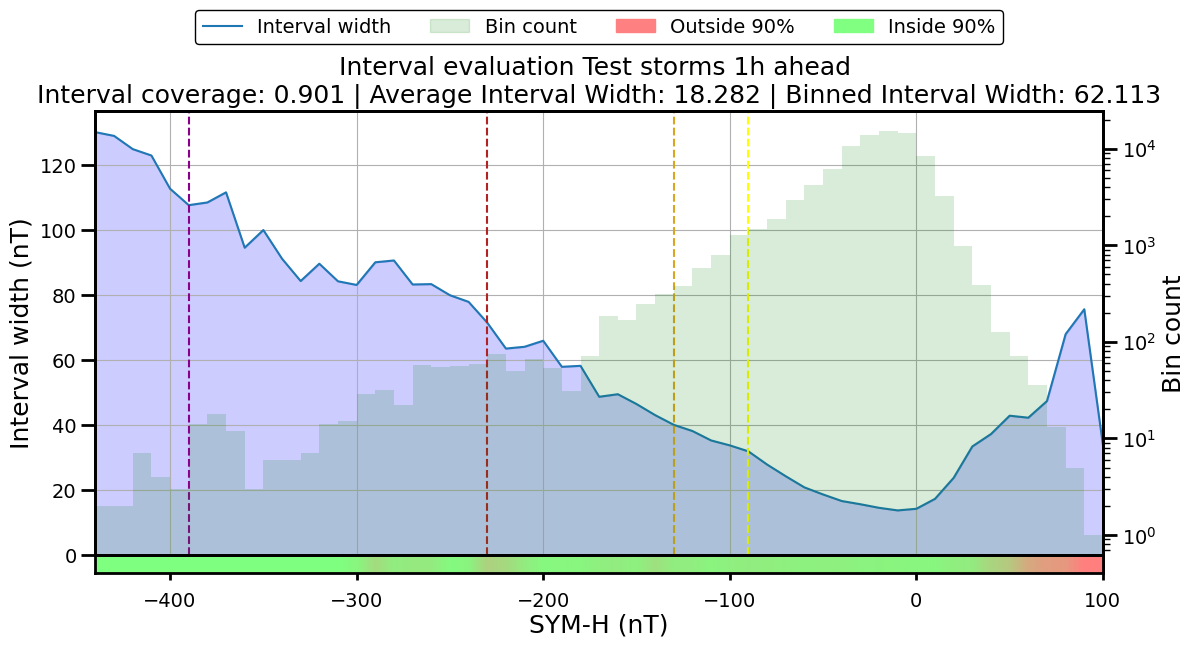

In [9]:
metrics.plot_evaluation_quantile(
    df_global_1h_test_new[['SYM_H', 'q05_predicted_SYM_H', 'q95_predicted_SYM_H']],
    title = 'Interval evaluation Test storms 1h ahead',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
);

plt.savefig(f'./figs/interval-evaluation-sym-h-{str(hours)}h-global-test.png', bbox_inches='tight', transparent = True)

plt.show();

## Test key storms 1 hour ahead
<a id='test-key-1h-new'>

Test key storms 1h ahead


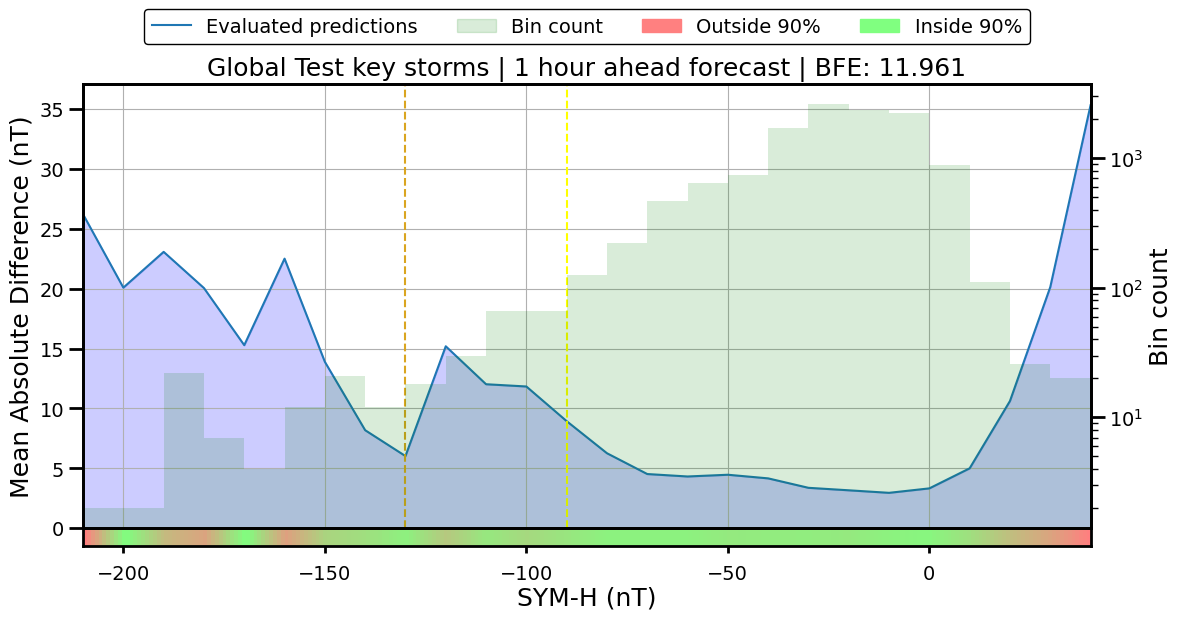

Metrics summary


,StormIndex,BFE,RMSE,R2,pct_inside_90,interval_width_mean_90,binned_interval_width_90
0,117,9.719,5.966,0.974,0.884,15.135,27.199
1,118,4.660,4.467,0.940,0.882,12.675,17.720
2,119,11.881,8.074,0.875,0.757,14.307,21.092
3,120,4.474,4.528,0.958,0.920,13.942,19.158
4,121,11.795,6.522,0.841,0.813,12.619,26.648
5,122,7.468,4.706,0.952,0.903,12.322,17.814
6,Mean:,8.333,5.711,0.923,0.860,13.500,21.605
7,Global:,11.961,5.875,0.944,0.859,13.480,27.611


\begin{tabular}{lrrrrrr}
\toprule
StormIndex &    BFE &  RMSE &    R2 &  pct\_inside\_90 &  interval\_width\_mean\_90 &  binned\_interval\_width\_90 \\
\midrule
       117 &  9.719 & 5.966 & 0.974 &          0.884 &                  15.135 &                    27.199 \\
       118 &  4.660 & 4.467 & 0.940 &          0.882 &                  12.675 &                    17.720 \\
       119 & 11.881 & 8.074 & 0.875 &          0.757 &                  14.307 &                    21.092 \\
       120 &  4.474 & 4.528 & 0.958 &          0.920 &                  13.942 &                    19.158 \\
       121 & 11.795 & 6.522 & 0.841 &          0.813 &                  12.619 &                    26.648 \\
       122 &  7.468 & 4.706 & 0.952 &          0.903 &                  12.322 &                    17.814 \\
     Mean: &  8.333 & 5.711 & 0.923 &          0.860 &                  13.500 &                    21.605 \\
   Global: & 11.961 & 5.875 & 0.944 &          0.859 &               

In [10]:
print('Test key storms 1h ahead')
all_predictions_dfs = []
storm_bfes = []
storm_rmses = []
storm_r2s = []
peak_inside_90 = []
pct_inside_90 = []
dfs_global = []

summary_df = None

hours = 1
    
for sd, ed, storm_index in storm_dates.TEST_KEY_STORMS_INFO_SYM_H:
    start_date = pd.to_datetime(sd)
    end_date = pd.to_datetime(ed)
    df_eval = preds_new_split_test_key_1h[start_date : end_date].copy()
    dfs_global.append(preds_new_split_test_key_1h[start_date : end_date].copy())
    metrics.plot_forecast_quantile(
        preds_new_split_test_key_1h[start_date : end_date][[
            'SYM_H', 'mse_predicted_SYM_H', 'q05_predicted_SYM_H', 'q95_predicted_SYM_H']],
        title = f'Test key storm {storm_index} | From {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} | 1 hour ahead forecast',
        plot_sym_bars = True,
        plot_prediction_error = False,
        big_quantile_color = [31 / 255, 176 / 255, 255 / 255, 1],
    )

    plt.savefig(f'./figs/sym-h-{str(hours)}h-forecast-q-test-key-{storm_index}.png', bbox_inches='tight', transparent = True)

    #plt.show();

    plt.close();
    metrics.plot_evaluation_bfe_quantile(
        preds_new_split_test_key_1h[start_date : end_date][[
            'SYM_H', 'mse_predicted_SYM_H', 'inside_90%']],
        title = f'Test key storm {storm_index} | From {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} | 1 hour ahead forecast',
        plot_sym_bars = True,
        xlabel_title = 'SYM-H (nT)',
    )

    plt.savefig(f'./figs/sym-h-{str(hours)}h-bfe-q-test-key-{storm_index}.png', bbox_inches='tight', transparent = True)

    plt.close();
    
    metrics.plot_evaluation_quantile(
        preds_new_split_test_key_1h[start_date : end_date][['SYM_H', 'q05_predicted_SYM_H', 'q95_predicted_SYM_H']],
        title = f'Test key storm {storm_index} | From {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} | 1 hour ahead interval evaluation',
        plot_sym_bars = True,
        xlabel_title = 'SYM-H (nT)'
    );

    plt.savefig(f'./figs/sym-h-{str(hours)}h-interval-evaluation-test-key-{storm_index}.png', bbox_inches='tight', transparent = True)

    plt.close()
    
    rmse = metrics.rmse(
        df_eval["SYM_H"],
        df_eval['mse_predicted_SYM_H']        
    )
    storm_rmses.append(rmse)
    r2 = metrics.r2m(
        df_eval["SYM_H"],
        df_eval['mse_predicted_SYM_H']        
    )
    storm_r2s.append(r2)
    bfe = metrics.calculate_BFE(
        df_eval["SYM_H"],
        df_eval['mse_predicted_SYM_H']
    )
    storm_bfes.append(bfe)

    in_90 = int(df_eval.loc[df_eval['SYM_H'].idxmin(), 'inside_90%'])
    peak_inside_90.append(in_90)

    pct_inside_90_val, width_mean_90, biw_90 = metrics.calculate_interval_stats(        
        df_eval['SYM_H'],
        df_eval['q05_predicted_SYM_H'],
        df_eval['q95_predicted_SYM_H'],
    )
    pct_inside_90.append(pct_inside_90_val)
    
    summary_df_data = [str(storm_index), bfe, rmse, r2, pct_inside_90_val, width_mean_90, biw_90]
    
    if summary_df is None:
        summary_df = pd.DataFrame([summary_df_data], columns = summary_columns)
    else:
        summary_df = pd.concat([
            summary_df,
            pd.DataFrame(
                data = [summary_df_data],
                columns = summary_columns
            )
        ])

data_for_means = ['Mean:']
for col in summary_df.columns[1:]:
    data_for_means.append(np.mean(summary_df[col]))
    
summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_means],
        columns = summary_columns,
    )
], ignore_index = True)


df_global = pd.concat(dfs_global)

metrics.plot_evaluation_bfe_quantile(
    df_global[['SYM_H', 'mse_predicted_SYM_H', 'inside_90%']],
    title = f'Global Test key storms | 1 hour ahead forecast',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
)

plt.savefig(f'./figs/sym-h-{str(hours)}h-bfe-q-global-test-key.png', bbox_inches='tight', transparent = True)

plt.show();

rmse_global = metrics.rmse(df_global['SYM_H'], df_global['mse_predicted_SYM_H'])
r2_global = metrics.r2m(df_global['SYM_H'], df_global['mse_predicted_SYM_H'])
bfe_global = metrics.calculate_BFE(df_global['SYM_H'], df_global['mse_predicted_SYM_H'])

inside_90_global, width_mean_global_90, biw_global_90 = metrics.calculate_interval_stats(        
    df_global['SYM_H'],
    df_global['q05_predicted_SYM_H'],
    df_global['q95_predicted_SYM_H'],
)
    
data_for_global = ['Global:', bfe_global, rmse_global, r2_global,
                    inside_90_global, width_mean_global_90, biw_global_90]

summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_global],
        columns = summary_columns,
    )
], ignore_index = True)

print('Metrics summary')
display(summary_df.round(3))
summary_new_test_key_1h = summary_df.copy()

df_global_1h_test_key_new = df_global.copy()

print(summary_df[['StormIndex', 'BFE', 'RMSE', 'R2', 'pct_inside_90', 'interval_width_mean_90', 'binned_interval_width_90']].round(3).to_latex(index=False))

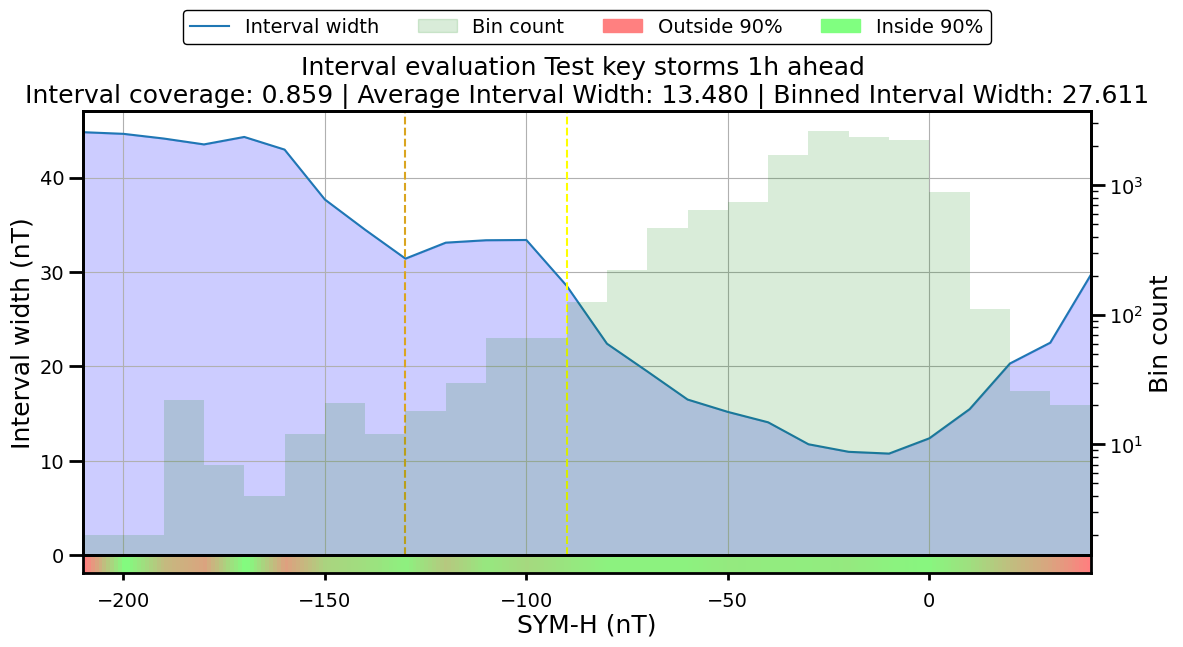

In [11]:
metrics.plot_evaluation_quantile(
    df_global_1h_test_key_new[['SYM_H', 'q05_predicted_SYM_H', 'q95_predicted_SYM_H']],
    title = 'Interval evaluation Test key storms 1h ahead',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
);

plt.savefig(f'./figs/interval-evaluation-sym-h-{str(hours)}h-global-test-key.png', bbox_inches='tight', transparent = True)

plt.show();

## Test storms 2 hour ahead
<a id='test-2h-new'>

Test storms 2h ahead


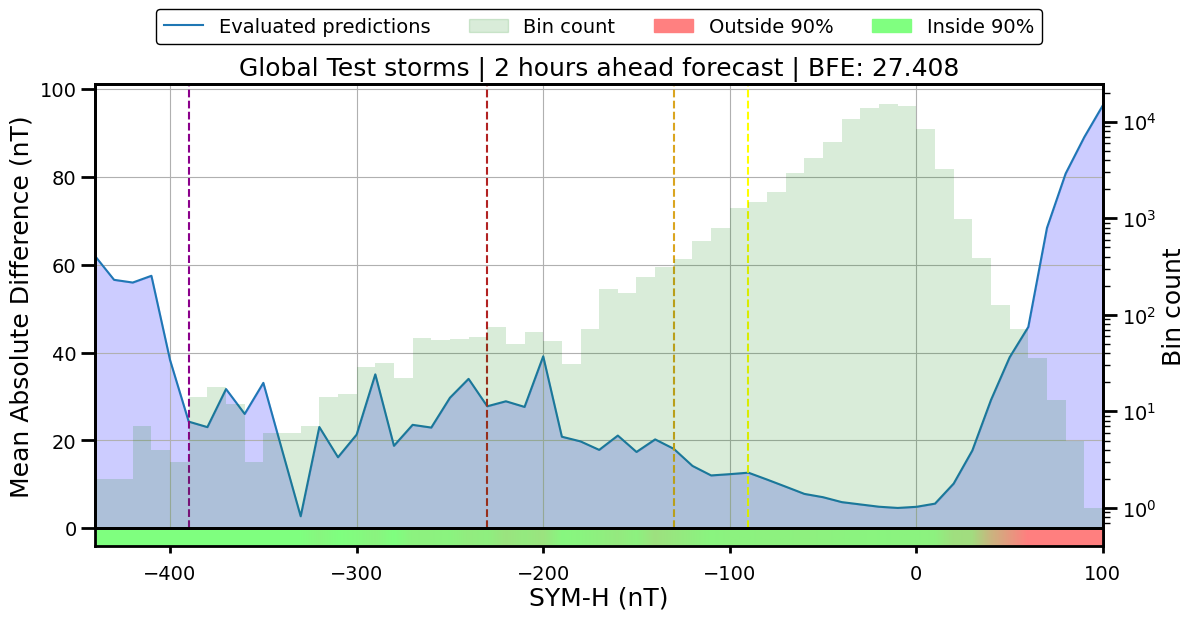

Metrics summary


,StormIndex,BFE,RMSE,R2,pct_inside_90,interval_width_mean_90,binned_interval_width_90
0,81,12.967,9.008,0.800,0.914,25.867,39.602
1,82,15.359,11.182,0.921,0.864,29.355,41.755
2,83,9.025,9.441,0.888,0.892,28.874,37.199
3,84,16.407,13.336,0.863,0.907,31.189,43.593
4,85,7.372,5.564,0.952,0.983,23.378,37.708
5,86,5.608,6.762,0.932,0.963,27.247,32.281
6,87,14.124,9.034,0.852,0.913,27.353,44.744
7,88,11.790,9.090,0.882,0.941,27.692,40.709
8,89,15.269,9.267,0.972,0.914,28.731,68.317
9,90,14.796,10.177,0.893,0.920,26.395,48.338


\begin{tabular}{lrrrrrr}
\toprule
StormIndex &    BFE &   RMSE &    R2 &  pct\_inside\_90 &  interval\_width\_mean\_90 &  binned\_interval\_width\_90 \\
\midrule
        81 & 12.967 &  9.008 & 0.800 &          0.914 &                  25.867 &                    39.602 \\
        82 & 15.359 & 11.182 & 0.921 &          0.864 &                  29.355 &                    41.755 \\
        83 &  9.025 &  9.441 & 0.888 &          0.892 &                  28.874 &                    37.199 \\
        84 & 16.407 & 13.336 & 0.863 &          0.907 &                  31.189 &                    43.593 \\
        85 &  7.372 &  5.564 & 0.952 &          0.983 &                  23.378 &                    37.708 \\
        86 &  5.608 &  6.762 & 0.932 &          0.963 &                  27.247 &                    32.281 \\
        87 & 14.124 &  9.034 & 0.852 &          0.913 &                  27.353 &                    44.744 \\
        88 & 11.790 &  9.090 & 0.882 &          0.941 &      

In [12]:
print('Test storms 2h ahead')
all_predictions_dfs = []
storm_bfes = []
storm_rmses = []
storm_r2s = []
peak_inside_90 = []
pct_inside_90 = []
dfs_global = []

hours = 2

summary_df = None
    
for sd, ed, storm_index in storm_dates.TEST_STORMS_INFO_SYM_H:
    start_date = pd.to_datetime(sd)
    end_date = pd.to_datetime(ed)
    df_eval = preds_new_split_test_2h[start_date : end_date].copy()
    dfs_global.append(preds_new_split_test_2h[start_date : end_date].copy())
    metrics.plot_forecast_quantile(
        preds_new_split_test_2h[start_date : end_date][[
            'SYM_H', 'mse_predicted_SYM_H', 'q05_predicted_SYM_H', 'q95_predicted_SYM_H']],
        title = f'Test storm {storm_index} | From {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} | {str(hours)} hours ahead forecast',
        plot_sym_bars = True,
        plot_prediction_error = False,
        big_quantile_color = [31 / 255, 176 / 255, 255 / 255, 1],
    )

    plt.savefig(f'./figs/sym-h-{str(hours)}h-forecast-q-test-{storm_index}.png', bbox_inches='tight', transparent = True)

    plt.close();
    metrics.plot_evaluation_bfe_quantile(
        preds_new_split_test_2h[start_date : end_date][[
            'SYM_H', 'mse_predicted_SYM_H', 'inside_90%']],
        title = f'Test storm {storm_index} | From {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} | {str(hours)} hours ahead forecast',
        plot_sym_bars = True,
        xlabel_title = 'SYM-H (nT)',
    )

    plt.savefig(f'./figs/sym-h-{str(hours)}h-bfe-q-test-{storm_index}.png', bbox_inches='tight', transparent = True)

    plt.close();
    
    metrics.plot_evaluation_quantile(
        preds_new_split_test_2h[start_date : end_date][['SYM_H', 'q05_predicted_SYM_H', 'q95_predicted_SYM_H']],
        title = f'Test storm {storm_index} | From {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} | 2 hours ahead interval evaluation',
        plot_sym_bars = True,
        xlabel_title = 'SYM-H (nT)'
    );

    plt.savefig(f'./figs/sym-h-{str(hours)}h-interval-evaluation-test-{storm_index}.png', bbox_inches='tight', transparent = True)

    plt.close()
    
    rmse = metrics.rmse(
        df_eval["SYM_H"],
        df_eval['mse_predicted_SYM_H']        
    )
    storm_rmses.append(rmse)
    r2 = metrics.r2m(
        df_eval["SYM_H"],
        df_eval['mse_predicted_SYM_H']        
    )
    storm_r2s.append(r2)
    bfe = metrics.calculate_BFE(
        df_eval["SYM_H"],
        df_eval['mse_predicted_SYM_H']
    )
    storm_bfes.append(bfe)

    in_90 = int(df_eval.loc[df_eval['SYM_H'].idxmin(), 'inside_90%'])
    peak_inside_90.append(in_90)

    pct_inside_90_val, width_mean_90, biw_90 = metrics.calculate_interval_stats(        
        df_eval['SYM_H'],
        df_eval['q05_predicted_SYM_H'],
        df_eval['q95_predicted_SYM_H'],
    )
    pct_inside_90.append(pct_inside_90_val)
    
    summary_df_data = [str(storm_index), bfe, rmse, r2, pct_inside_90_val, width_mean_90, biw_90]
    
    if summary_df is None:
        summary_df = pd.DataFrame([summary_df_data], columns = summary_columns)
    else:
        summary_df = pd.concat([
            summary_df,
            pd.DataFrame(
                data = [summary_df_data],
                columns = summary_columns
            )
        ])

data_for_means = ['Mean:']
for col in summary_df.columns[1:]:
    data_for_means.append(np.mean(summary_df[col]))
    
summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_means],
        columns = summary_columns,
    )
], ignore_index = True)


df_global = pd.concat(dfs_global)

metrics.plot_evaluation_bfe_quantile(
    df_global[['SYM_H', 'mse_predicted_SYM_H', 'inside_90%']],
    title = f'Global Test storms | 2 hours ahead forecast',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
)

plt.savefig(f'./figs/sym-h-{str(hours)}h-bfe-q-global-test.png', bbox_inches='tight', transparent = True)

plt.show();

rmse_global = metrics.rmse(df_global['SYM_H'], df_global['mse_predicted_SYM_H'])
r2_global = metrics.r2m(df_global['SYM_H'], df_global['mse_predicted_SYM_H'])
bfe_global = metrics.calculate_BFE(df_global['SYM_H'], df_global['mse_predicted_SYM_H'])
inside_90_global, width_mean_global_90, biw_global_90 = metrics.calculate_interval_stats(        
    df_global['SYM_H'],
    df_global['q05_predicted_SYM_H'],
    df_global['q95_predicted_SYM_H'],
)
    
data_for_global = ['Global:', bfe_global, rmse_global, r2_global, 
                    inside_90_global, width_mean_global_90, biw_global_90]
 
summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_global],
        columns = summary_columns,
    )
], ignore_index = True)

print('Metrics summary')
display(summary_df.round(3))
summary_new_test_2h = summary_df.copy()

df_global_2h_test_new = df_global.copy()

print(summary_df[['StormIndex', 'BFE', 'RMSE', 'R2', 'pct_inside_90', 'interval_width_mean_90', 'binned_interval_width_90']].round(3).to_latex(index=False))

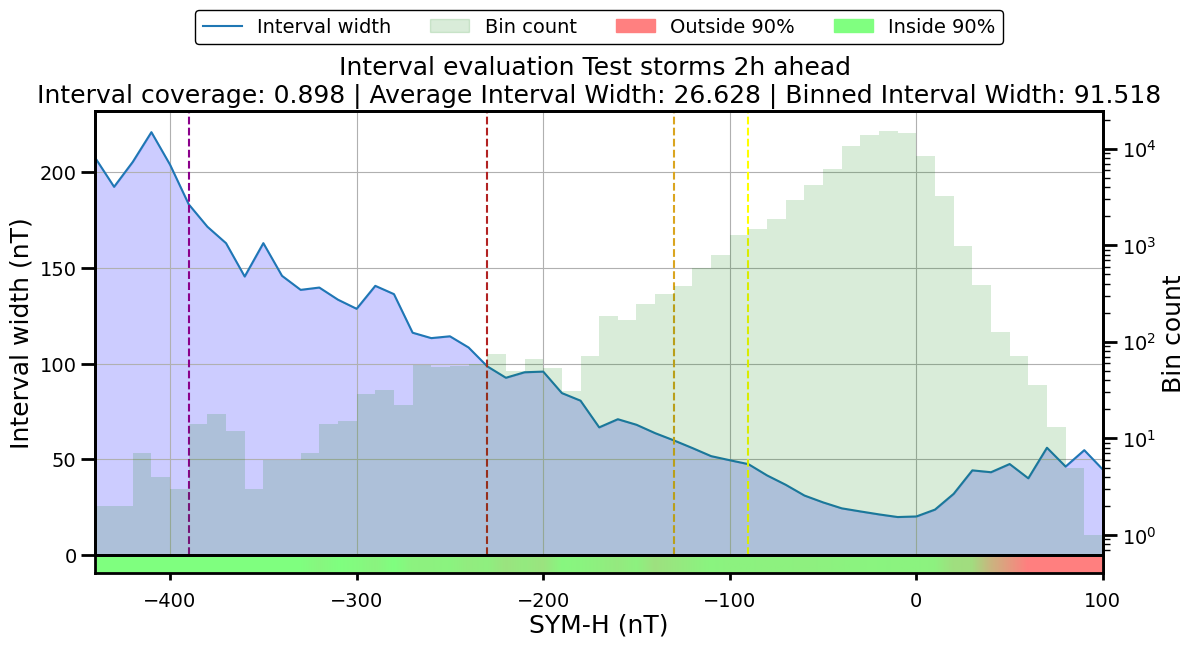

In [13]:
metrics.plot_evaluation_quantile(
    df_global_2h_test_new[['SYM_H', 'q05_predicted_SYM_H', 'q95_predicted_SYM_H']],
    title = 'Interval evaluation Test storms 2h ahead',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)'
);
plt.savefig(f'./figs/interval-evaluation-sym-h-{str(hours)}h-global-test.png', bbox_inches='tight', transparent = True)
plt.show();

## Test key storms 2 hour ahead
<a id='test-key-2h-new'>

Test key storms 2h ahead


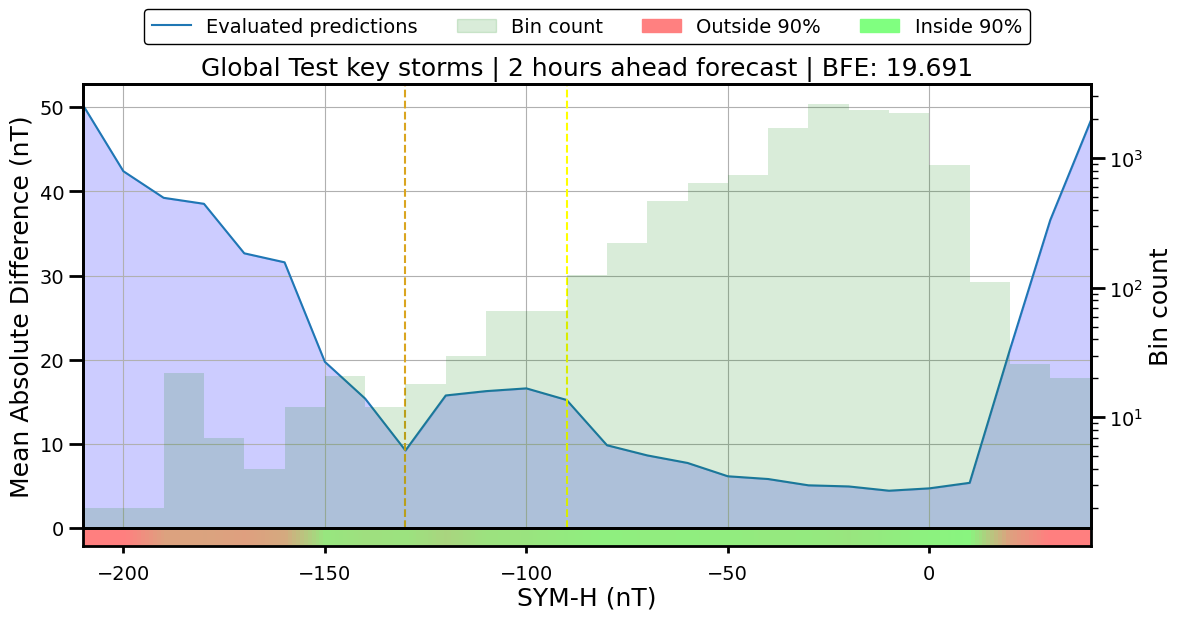

Metrics summary


,StormIndex,BFE,RMSE,R2,pct_inside_90,interval_width_mean_90,binned_interval_width_90
0,117,16.503,9.680,0.932,0.858,22.233,39.701
1,118,6.960,6.451,0.874,0.881,18.787,26.465
2,119,17.621,11.080,0.765,0.733,20.535,28.681
3,120,6.715,6.235,0.920,0.911,19.727,28.025
4,121,15.375,9.531,0.661,0.766,19.174,37.230
5,122,12.186,7.806,0.868,0.853,18.722,25.941
6,Mean:,12.560,8.464,0.837,0.834,19.863,31.007
7,Global:,19.691,8.670,0.879,0.832,19.847,38.451


\begin{tabular}{lrrrrrr}
\toprule
StormIndex &    BFE &   RMSE &    R2 &  pct\_inside\_90 &  interval\_width\_mean\_90 &  binned\_interval\_width\_90 \\
\midrule
       117 & 16.503 &  9.680 & 0.932 &          0.858 &                  22.233 &                    39.701 \\
       118 &  6.960 &  6.451 & 0.874 &          0.881 &                  18.787 &                    26.465 \\
       119 & 17.621 & 11.080 & 0.765 &          0.733 &                  20.535 &                    28.681 \\
       120 &  6.715 &  6.235 & 0.920 &          0.911 &                  19.727 &                    28.025 \\
       121 & 15.375 &  9.531 & 0.661 &          0.766 &                  19.174 &                    37.230 \\
       122 & 12.186 &  7.806 & 0.868 &          0.853 &                  18.722 &                    25.941 \\
     Mean: & 12.560 &  8.464 & 0.837 &          0.834 &                  19.863 &                    31.007 \\
   Global: & 19.691 &  8.670 & 0.879 &          0.832 &      

In [14]:
print('Test key storms 2h ahead')
all_predictions_dfs = []
storm_bfes = []
storm_rmses = []
storm_r2s = []
peak_inside_90 = []
pct_inside_90 = []
dfs_global = []

hours = 2

summary_df = None
    
for sd, ed, storm_index in storm_dates.TEST_KEY_STORMS_INFO_SYM_H:
    start_date = pd.to_datetime(sd)
    end_date = pd.to_datetime(ed)
    df_eval = preds_new_split_test_key_2h[start_date : end_date].copy()
    dfs_global.append(preds_new_split_test_key_2h[start_date : end_date].copy())
    metrics.plot_forecast_quantile(
        preds_new_split_test_key_2h[start_date : end_date][[
            'SYM_H', 'mse_predicted_SYM_H', 'q05_predicted_SYM_H', 'q95_predicted_SYM_H']],
        title = f'Test key storm {storm_index} | From {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} | {str(hours)} hours ahead forecast',
        plot_sym_bars = True,
        plot_prediction_error = False,
        big_quantile_color = [31 / 255, 176 / 255, 255 / 255, 1],
    )
    plt.savefig(f'./figs/sym-h-{str(hours)}h-forecast-q-test-key-{storm_index}.png', bbox_inches='tight', transparent = True)
    plt.close();
    metrics.plot_evaluation_bfe_quantile(
        preds_new_split_test_key_2h[start_date : end_date][[
            'SYM_H', 'mse_predicted_SYM_H', 'inside_90%']],
        title = f'Test key storm {storm_index} | From {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} | {str(hours)} hours ahead forecast',
        plot_sym_bars = True,
        xlabel_title = 'SYM-H (nT)',
    )
    plt.savefig(f'./figs/sym-h-{str(hours)}h-bfe-q-test-key-{storm_index}.png', bbox_inches='tight', transparent = True)
    plt.close();
    
    metrics.plot_evaluation_quantile(
        preds_new_split_test_key_2h[start_date : end_date][['SYM_H', 'q05_predicted_SYM_H', 'q95_predicted_SYM_H']],
        title = f'Test key storm {storm_index} | From {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")} | 2 hours ahead interval evaluation',
        plot_sym_bars = True,
        xlabel_title = 'SYM-H (nT)'
    );
    plt.savefig(f'./figs/sym-h-{str(hours)}h-interval-evaluation-test-key-{storm_index}.png', bbox_inches='tight', transparent = True)
    plt.close()
    
    rmse = metrics.rmse(
        df_eval["SYM_H"],
        df_eval['mse_predicted_SYM_H']        
    )
    storm_rmses.append(rmse)
    r2 = metrics.r2m(
        df_eval["SYM_H"],
        df_eval['mse_predicted_SYM_H']        
    )
    storm_r2s.append(r2)
    bfe = metrics.calculate_BFE(
        df_eval["SYM_H"],
        df_eval['mse_predicted_SYM_H']
    )
    storm_bfes.append(bfe)

    in_90 = int(df_eval.loc[df_eval['SYM_H'].idxmin(), 'inside_90%'])
    peak_inside_90.append(in_90)
    
    pct_inside_90_val, width_mean_90, biw_90 = metrics.calculate_interval_stats(        
        df_eval['SYM_H'],
        df_eval['q05_predicted_SYM_H'],
        df_eval['q95_predicted_SYM_H'],
    )
    pct_inside_90.append(pct_inside_90_val)
    
    summary_df_data = [str(storm_index), bfe, rmse, r2, pct_inside_90_val, width_mean_90, biw_90]
    
    if summary_df is None:
        summary_df = pd.DataFrame([summary_df_data], columns = summary_columns)
    else:
        summary_df = pd.concat([
            summary_df,
            pd.DataFrame(
                data = [summary_df_data],
                columns = summary_columns
            )
        ])

data_for_means = ['Mean:']
for col in summary_df.columns[1:]:
    data_for_means.append(np.mean(summary_df[col]))
    
summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_means],
        columns = summary_columns,
    )
], ignore_index = True)


df_global = pd.concat(dfs_global)

metrics.plot_evaluation_bfe_quantile(
    df_global[['SYM_H', 'mse_predicted_SYM_H', 'inside_90%']],
    title = f'Global Test key storms | 2 hours ahead forecast',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
)
plt.savefig(f'./figs/sym-h-{str(hours)}h-bfe-q-global-test-key.png', bbox_inches='tight', transparent = True)
plt.show();

rmse_global = metrics.rmse(df_global['SYM_H'], df_global['mse_predicted_SYM_H'])
r2_global = metrics.r2m(df_global['SYM_H'], df_global['mse_predicted_SYM_H'])
bfe_global = metrics.calculate_BFE(df_global['SYM_H'], df_global['mse_predicted_SYM_H'])

inside_90_global, width_mean_global_90, biw_global_90 = metrics.calculate_interval_stats(        
    df_global['SYM_H'],
    df_global['q05_predicted_SYM_H'],
    df_global['q95_predicted_SYM_H'],
)
    
data_for_global = ['Global:', bfe_global, rmse_global, r2_global, 
                    inside_90_global, width_mean_global_90, biw_global_90]


summary_df = pd.concat([
    summary_df,
    pd.DataFrame(
        data = [data_for_global],
        columns = summary_columns,
    )
], ignore_index = True)

print('Metrics summary')
display(summary_df.round(3))
summary_new_test_key_2h = summary_df.copy()

df_global_2h_test_key_new = df_global.copy()

print(summary_df[['StormIndex', 'BFE', 'RMSE', 'R2', 'pct_inside_90', 'interval_width_mean_90', 'binned_interval_width_90']].round(3).to_latex(index=False))

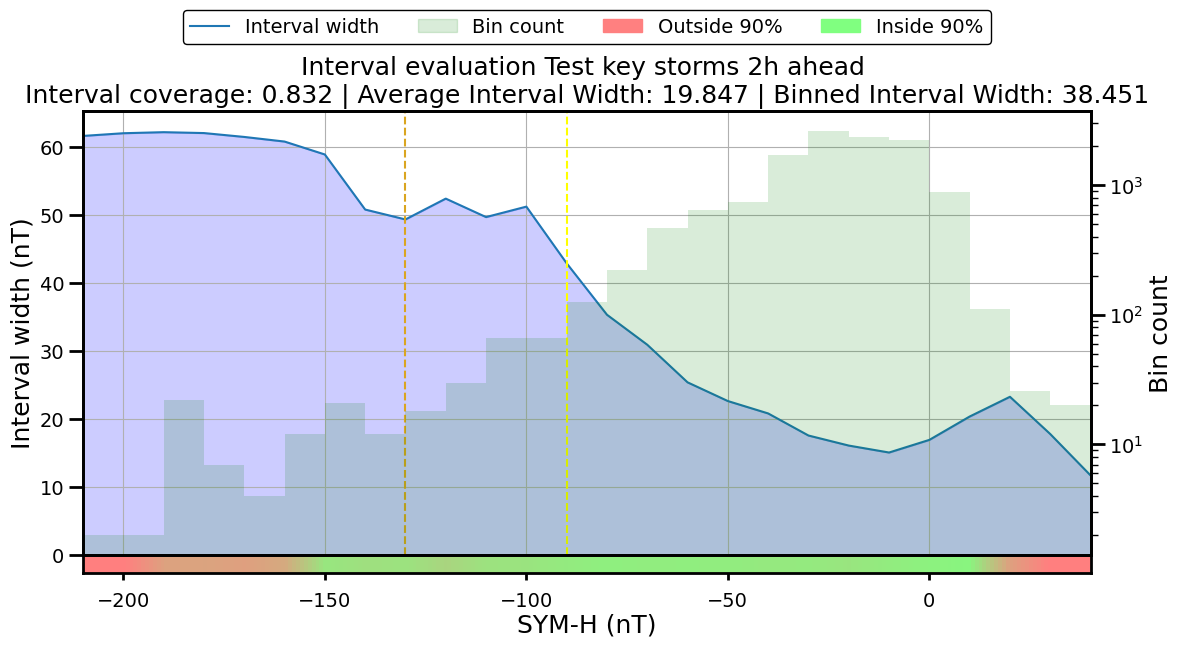

In [15]:
metrics.plot_evaluation_quantile(
    df_global_2h_test_key_new[['SYM_H', 'q05_predicted_SYM_H', 'q95_predicted_SYM_H']],
    title = 'Interval evaluation Test key storms 2h ahead',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
);
plt.savefig(f'./figs/interval-evaluation-sym-h-{str(hours)}h-global-test-key.png', bbox_inches='tight', transparent = True)
plt.show();

## Comparisons
<a id='comparisons'>

In [16]:
hours = 1

Diff BFE (Global BFE Test storms 1h old split - Global BFE Test storms 1h new split):
Total: 1.085


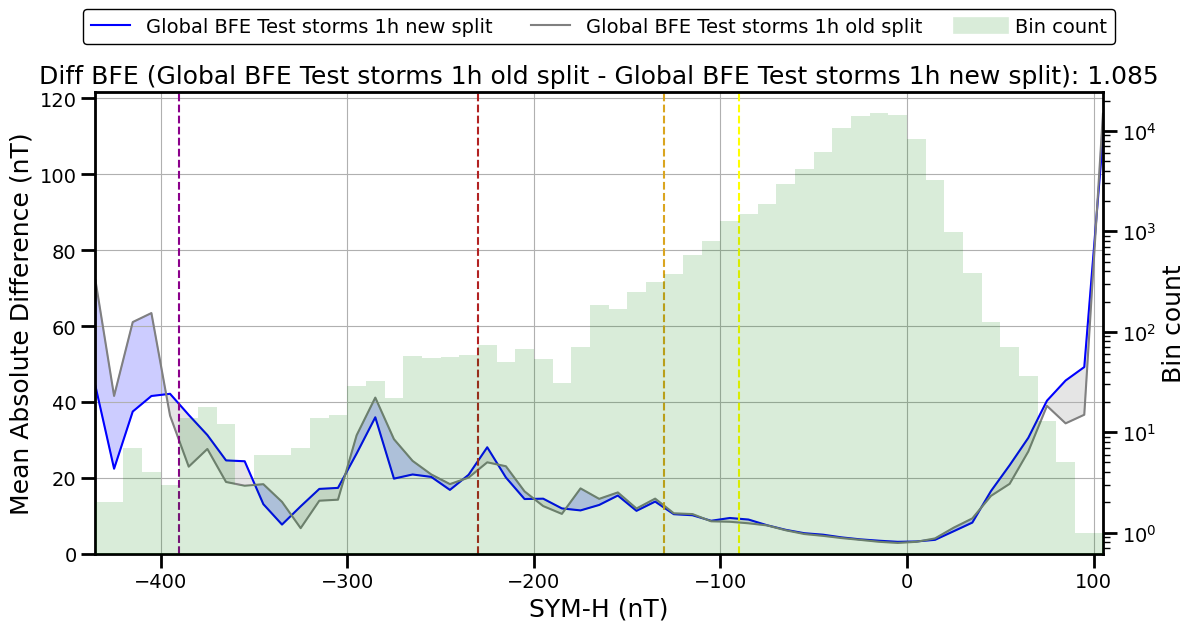

In [17]:
metrics.plot_comparison_bfe(
    df_global_1h_test_new[['SYM_H', 'mse_predicted_SYM_H']],
    df_global_1h_test_prev[['SYM_H', 'predicted_SYM_H']],
    title='Global BFE Test storms 1h new split',
    title_to_compare='Global BFE Test storms 1h old split',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
);

plt.savefig(f'./figs/bfe-comparison-sym-h-{str(hours)}h-test.png', bbox_inches='tight', transparent = True)
plt.show();

In [18]:
comparison_test_1h = pd.concat([summary_old_test_1h, summary_new_test_1h.drop(columns = ['StormIndex'])], axis = 1)
display(comparison_test_1h)
print(comparison_test_1h[[
    'StormIndex', 
    'BFE_old', 'RMSE_old', 'R2_old',
    'BFE', 'RMSE', 'R2', 
    'pct_inside_90', 'interval_width_mean_90', 
    'binned_interval_width_90']].round(3).to_latex(index=False, float_format="%.3f"))

,StormIndex,BFE_old,RMSE_old,R2_old,BFE,RMSE,R2,pct_inside_90,interval_width_mean_90,binned_interval_width_90
0,81,7.888501,5.388884,0.928291,8.596158,5.860640,0.915186,0.905305,17.242256,25.666225
1,82,15.125760,8.788054,0.951449,13.118851,8.282060,0.956879,0.837382,20.599663,30.077021
2,83,6.245681,6.315500,0.949961,6.341113,6.656995,0.944404,0.891919,19.617141,25.319626
3,84,9.596814,8.175090,0.948430,8.964811,8.637811,0.942427,0.915621,20.873454,31.654729
4,85,5.848421,4.799640,0.963914,5.213034,4.669927,0.965838,0.963991,15.834011,23.689900
5,86,4.013370,4.621275,0.968025,3.882158,4.857964,0.964665,0.958354,18.517779,22.431876
6,87,7.216732,5.380468,0.947503,7.884569,5.241524,0.950180,0.949430,18.016365,31.730796
7,88,4.118391,4.915896,0.965361,6.874639,5.791246,0.951926,0.953892,18.171049,27.312078
8,89,12.214298,7.472653,0.982015,12.632912,7.964564,0.979570,0.894143,19.995716,48.499590
9,90,8.796713,6.224136,0.959996,7.569158,6.283371,0.959231,0.903794,18.050531,31.820704


\begin{tabular}{lrrrrrrrrr}
\toprule
StormIndex &  BFE\_old &  RMSE\_old &  R2\_old &    BFE &   RMSE &    R2 &  pct\_inside\_90 &  interval\_width\_mean\_90 &  binned\_interval\_width\_90 \\
\midrule
        81 &    7.889 &     5.389 &   0.928 &  8.596 &  5.861 & 0.915 &          0.905 &                  17.242 &                    25.666 \\
        82 &   15.126 &     8.788 &   0.951 & 13.119 &  8.282 & 0.957 &          0.837 &                  20.600 &                    30.077 \\
        83 &    6.246 &     6.316 &   0.950 &  6.341 &  6.657 & 0.944 &          0.892 &                  19.617 &                    25.320 \\
        84 &    9.597 &     8.175 &   0.948 &  8.965 &  8.638 & 0.942 &          0.916 &                  20.873 &                    31.655 \\
        85 &    5.848 &     4.800 &   0.964 &  5.213 &  4.670 & 0.966 &          0.964 &                  15.834 &                    23.690 \\
        86 &    4.013 &     4.621 &   0.968 &  3.882 &  4.858 & 0.965 &        

Diff BFE (Global BFE Test key storms 1h old split - Global BFE Test key storms 1h new split):
Total: 1.672


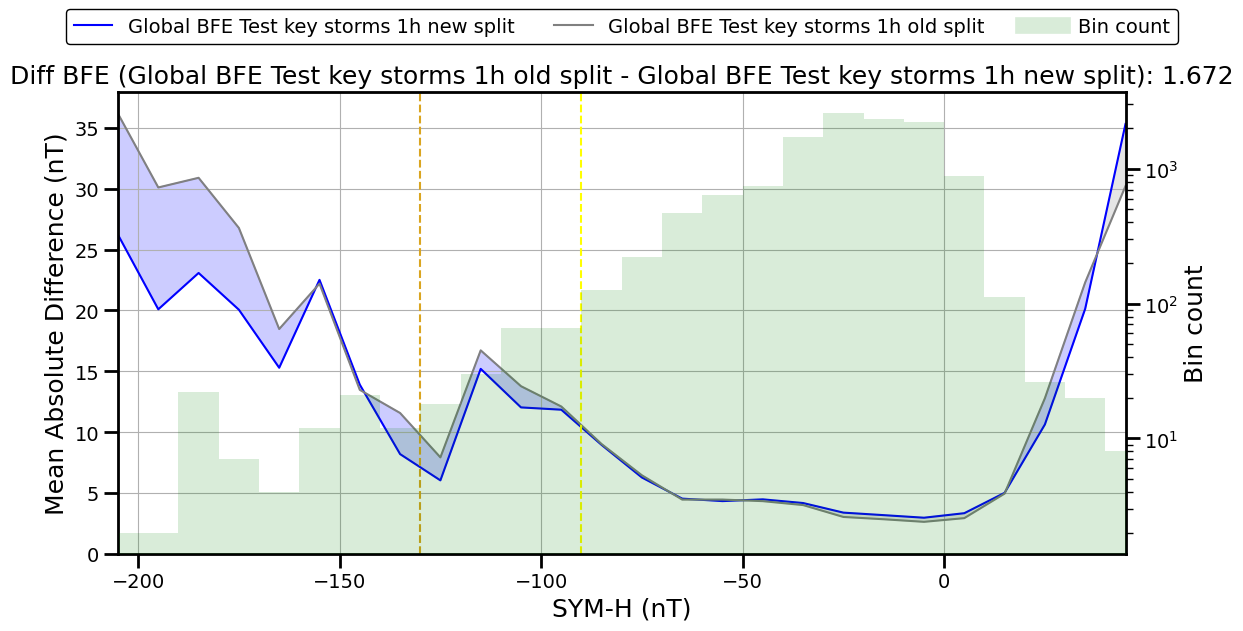

In [19]:
metrics.plot_comparison_bfe(
    df_global_1h_test_key_new[['SYM_H', 'mse_predicted_SYM_H']],
    df_global_1h_test_key_prev[['SYM_H', 'predicted_SYM_H']],
    title='Global BFE Test key storms 1h new split',
    title_to_compare='Global BFE Test key storms 1h old split',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
);
plt.savefig(f'./figs/bfe-comparison-sym-h-{str(hours)}h-global-test-key.png', bbox_inches='tight', transparent = True)
plt.show();

In [20]:
comparison_test_key_1h = pd.concat([summary_old_test_key_1h, summary_new_test_key_1h.drop(columns = ['StormIndex'])], axis = 1)
display(comparison_test_key_1h)
print(comparison_test_key_1h[[
    'StormIndex', 
    'BFE_old', 'RMSE_old', 'R2_old',
    'BFE', 'RMSE', 'R2', 
    'pct_inside_90', 'interval_width_mean_90', 
    'binned_interval_width_90']].round(3).to_latex(index=False, float_format="%.3f"))

,StormIndex,BFE_old,RMSE_old,R2_old,BFE,RMSE,R2,pct_inside_90,interval_width_mean_90,binned_interval_width_90
0,117,11.344071,6.691547,0.967421,9.719208,5.965604,0.974106,0.883986,15.135277,27.198982
1,118,4.674964,4.440906,0.940309,4.660450,4.467277,0.939598,0.882499,12.674690,17.719790
2,119,12.833294,8.094518,0.874549,11.880786,8.074496,0.875169,0.756569,14.307403,21.091791
3,120,3.694789,4.041187,0.966321,4.474218,4.528388,0.957711,0.920178,13.941710,19.157973
4,121,11.198657,5.851242,0.872139,11.794610,6.521897,0.841149,0.813015,12.619225,26.647834
5,122,8.291398,5.137193,0.942747,7.467704,4.706216,0.951951,0.903322,12.322127,17.813586
6,Mean:,8.672862,5.709432,0.927248,8.332829,5.710646,0.923281,0.859928,13.500072,21.604993
7,Global:,13.632770,5.872854,0.944460,11.961174,5.874774,0.944423,0.858838,13.479597,27.610602


\begin{tabular}{lrrrrrrrrr}
\toprule
StormIndex &  BFE\_old &  RMSE\_old &  R2\_old &    BFE &  RMSE &    R2 &  pct\_inside\_90 &  interval\_width\_mean\_90 &  binned\_interval\_width\_90 \\
\midrule
       117 &   11.344 &     6.692 &   0.967 &  9.719 & 5.966 & 0.974 &          0.884 &                  15.135 &                    27.199 \\
       118 &    4.675 &     4.441 &   0.940 &  4.660 & 4.467 & 0.940 &          0.882 &                  12.675 &                    17.720 \\
       119 &   12.833 &     8.095 &   0.875 & 11.881 & 8.074 & 0.875 &          0.757 &                  14.307 &                    21.092 \\
       120 &    3.695 &     4.041 &   0.966 &  4.474 & 4.528 & 0.958 &          0.920 &                  13.942 &                    19.158 \\
       121 &   11.199 &     5.851 &   0.872 & 11.795 & 6.522 & 0.841 &          0.813 &                  12.619 &                    26.648 \\
       122 &    8.291 &     5.137 &   0.943 &  7.468 & 4.706 & 0.952 &          0.903

In [21]:
hours = 2

Diff BFE (Global BFE Test storms 2h old split - Global BFE Test storms 2h new split):
Total: 3.399


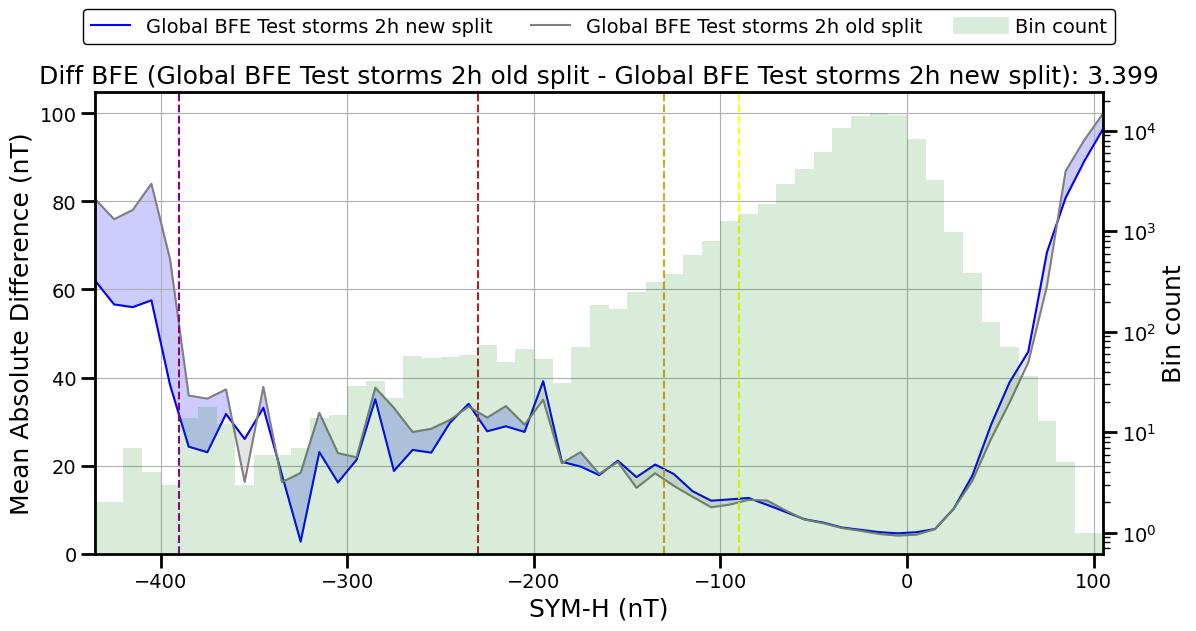

In [22]:
metrics.plot_comparison_bfe(
    df_global_2h_test_new[['SYM_H', 'mse_predicted_SYM_H']],
    df_global_2h_test_prev[['SYM_H', 'predicted_SYM_H']],
    title='Global BFE Test storms 2h new split',
    title_to_compare='Global BFE Test storms 2h old split',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
);
plt.savefig(f'./figs/bfe-comparison-sym-h-{str(hours)}h-test.png', bbox_inches='tight', transparent = True)
plt.show();

In [23]:
comparison_test_2h = pd.concat([summary_old_test_2h, summary_new_test_2h.drop(columns = ['StormIndex'])], axis = 1)
display(comparison_test_2h)
print(comparison_test_2h[[
    'StormIndex', 
    'BFE_old', 'RMSE_old', 'R2_old',
    'BFE', 'RMSE', 'R2',
    'pct_inside_90', 'interval_width_mean_90', 
    'binned_interval_width_90']].round(3).to_latex(index=False, float_format="%.3f"))

,StormIndex,BFE_old,RMSE_old,R2_old,BFE,RMSE,R2,pct_inside_90,interval_width_mean_90,binned_interval_width_90
0,81,12.073979,8.283808,0.830552,12.966805,9.007885,0.799635,0.913733,25.866831,39.602079
1,82,16.450218,11.630449,0.914963,15.358885,11.181512,0.921401,0.863659,29.354989,41.754697
2,83,8.392572,9.464620,0.887618,9.025459,9.440875,0.888181,0.891919,28.873617,37.198771
3,84,17.644107,12.723400,0.875085,16.406933,13.336138,0.862764,0.906809,31.188821,43.592646
4,85,6.866839,5.502323,0.952574,7.372223,5.563743,0.951509,0.983080,23.378012,37.708342
5,86,5.341422,6.819426,0.930371,5.608078,6.762088,0.931537,0.963312,27.246582,32.281330
6,87,11.598228,8.407726,0.871812,14.123924,9.034350,0.851992,0.913237,27.352950,44.744263
7,88,8.165611,7.581460,0.917611,11.789856,9.089649,0.881570,0.941001,27.692080,40.709460
8,89,16.643695,9.982788,0.967904,15.269362,9.266926,0.972342,0.914100,28.730973,68.316794
9,90,13.574427,9.432419,0.908127,14.796286,10.176692,0.893056,0.920407,26.394773,48.337662


\begin{tabular}{lrrrrrrrrr}
\toprule
StormIndex &  BFE\_old &  RMSE\_old &  R2\_old &    BFE &   RMSE &    R2 &  pct\_inside\_90 &  interval\_width\_mean\_90 &  binned\_interval\_width\_90 \\
\midrule
        81 &   12.074 &     8.284 &   0.831 & 12.967 &  9.008 & 0.800 &          0.914 &                  25.867 &                    39.602 \\
        82 &   16.450 &    11.630 &   0.915 & 15.359 & 11.182 & 0.921 &          0.864 &                  29.355 &                    41.755 \\
        83 &    8.393 &     9.465 &   0.888 &  9.025 &  9.441 & 0.888 &          0.892 &                  28.874 &                    37.199 \\
        84 &   17.644 &    12.723 &   0.875 & 16.407 & 13.336 & 0.863 &          0.907 &                  31.189 &                    43.593 \\
        85 &    6.867 &     5.502 &   0.953 &  7.372 &  5.564 & 0.952 &          0.983 &                  23.378 &                    37.708 \\
        86 &    5.341 &     6.819 &   0.930 &  5.608 &  6.762 & 0.932 &        

Diff BFE (Global BFE Test key storms 2h old split - Global BFE Test key storms 2h new split):
Total: 1.012


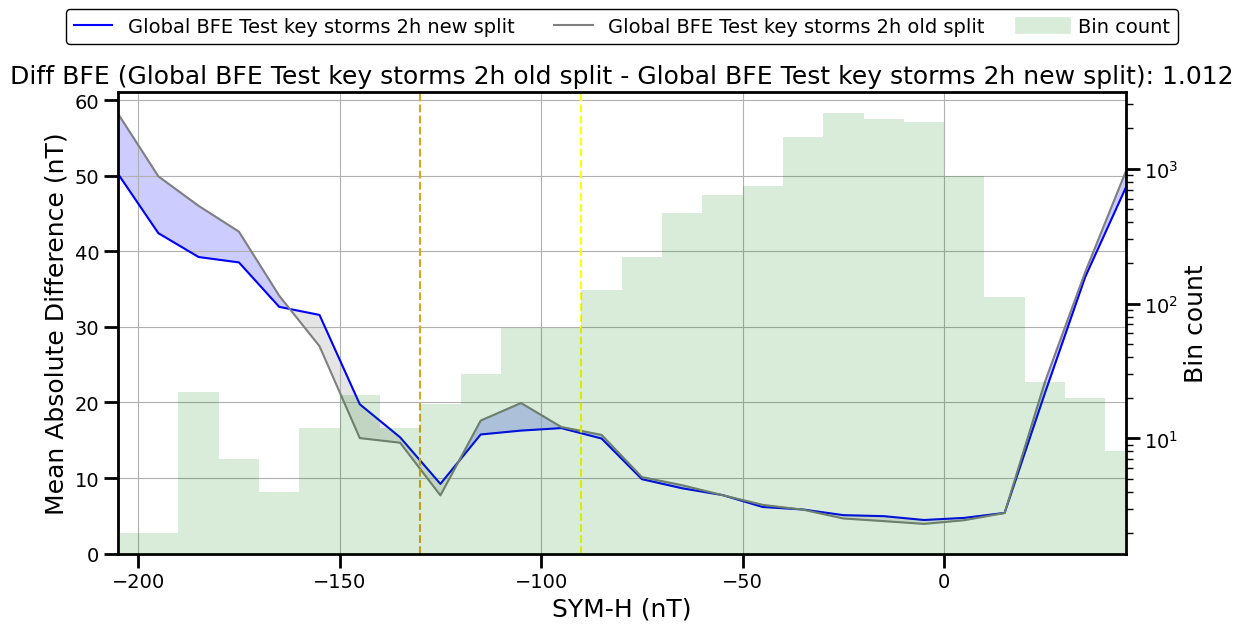

In [24]:
metrics.plot_comparison_bfe(
    df_global_2h_test_key_new[['SYM_H', 'mse_predicted_SYM_H']],
    df_global_2h_test_key_prev[['SYM_H', 'predicted_SYM_H']],
    title='Global BFE Test key storms 2h new split',
    title_to_compare='Global BFE Test key storms 2h old split',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
);
plt.savefig(f'./figs/bfe-comparison-sym-h-{str(hours)}h-bfe-q-global-test-key.png', bbox_inches='tight', transparent = True)
plt.show();

In [25]:
comparison_test_key_2h = pd.concat([summary_old_test_key_2h, summary_new_test_key_2h.drop(columns = ['StormIndex'])], axis = 1)
display(comparison_test_key_2h)
print(comparison_test_key_2h[[
    'StormIndex', 
    'BFE_old', 'RMSE_old', 'R2_old',
    'BFE', 'RMSE', 'R2', 
    'pct_inside_90', 'interval_width_mean_90', 
    'binned_interval_width_90']].round(3).to_latex(index=False, float_format="%.3f"))

,StormIndex,BFE_old,RMSE_old,R2_old,BFE,RMSE,R2,pct_inside_90,interval_width_mean_90,binned_interval_width_90
0,117,17.209850,10.356043,0.921968,16.503376,9.680193,0.931820,0.858205,22.232818,39.701319
1,118,7.689009,6.738716,0.862557,6.959808,6.451338,0.874030,0.881011,18.786757,26.465397
2,119,18.649313,10.928863,0.771313,17.620533,11.079717,0.764956,0.733267,20.534698,28.681285
3,120,5.335156,5.610241,0.935091,6.714775,6.235498,0.919817,0.911254,19.726984,28.025495
4,121,14.737107,9.019125,0.696212,15.374639,9.530982,0.660752,0.765727,19.173715,37.230026
5,122,14.190943,8.845033,0.830276,12.185613,7.806021,0.867809,0.853247,18.722171,25.940616
6,Mean:,12.968563,8.583003,0.836236,12.559791,8.463958,0.836531,0.833785,19.862857,31.007356
7,Global:,20.702170,8.791389,0.875541,19.690640,8.669673,0.878964,0.832203,19.846838,38.451071


\begin{tabular}{lrrrrrrrrr}
\toprule
StormIndex &  BFE\_old &  RMSE\_old &  R2\_old &    BFE &   RMSE &    R2 &  pct\_inside\_90 &  interval\_width\_mean\_90 &  binned\_interval\_width\_90 \\
\midrule
       117 &   17.210 &    10.356 &   0.922 & 16.503 &  9.680 & 0.932 &          0.858 &                  22.233 &                    39.701 \\
       118 &    7.689 &     6.739 &   0.863 &  6.960 &  6.451 & 0.874 &          0.881 &                  18.787 &                    26.465 \\
       119 &   18.649 &    10.929 &   0.771 & 17.621 & 11.080 & 0.765 &          0.733 &                  20.535 &                    28.681 \\
       120 &    5.335 &     5.610 &   0.935 &  6.715 &  6.235 & 0.920 &          0.911 &                  19.727 &                    28.025 \\
       121 &   14.737 &     9.019 &   0.696 & 15.375 &  9.531 & 0.661 &          0.766 &                  19.174 &                    37.230 \\
       122 &   14.191 &     8.845 &   0.830 & 12.186 &  7.806 & 0.868 &        

### Comparison 1h vs 2h
<a id='comparisons-1h-2h'>

Diff BFE (Global BFE Test storms 2h - Global BFE Test storms 1h):
Total: 7.240


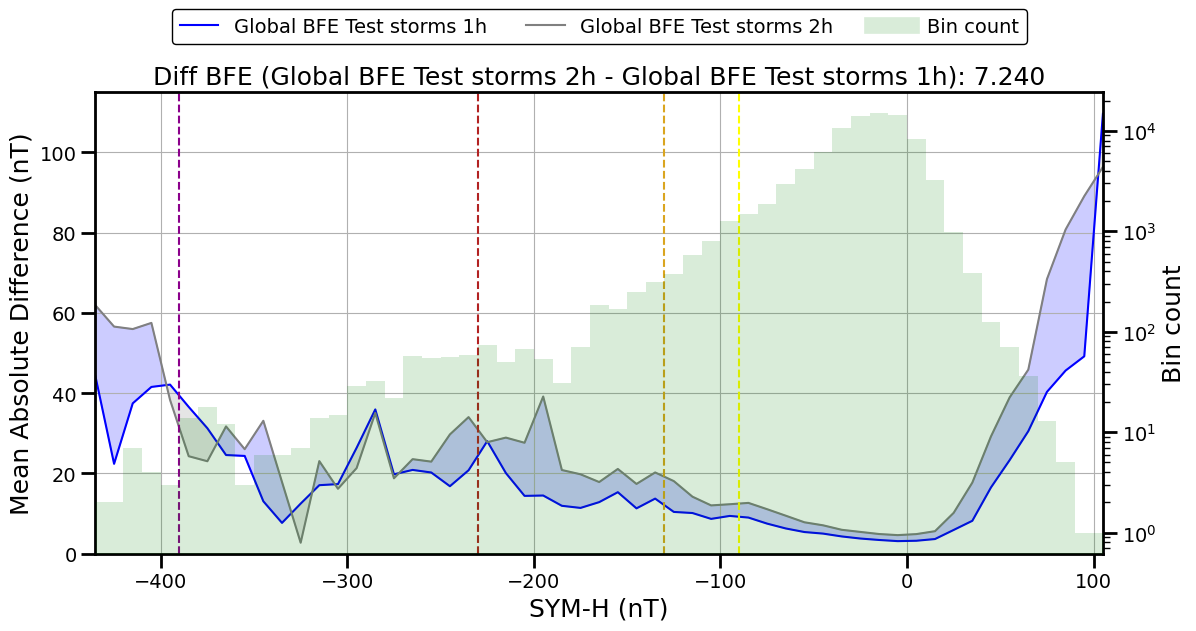

In [26]:
metrics.plot_comparison_bfe(
    df_global_1h_test_new[['SYM_H', 'mse_predicted_SYM_H']],
    df_global_2h_test_new[['SYM_H', 'mse_predicted_SYM_H']],
    title='Global BFE Test storms 1h',
    title_to_compare='Global BFE Test storms 2h',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
);
plt.savefig(f'./figs/bfe-comparison-sym-h-1h-vs-2h-bfe-q-global-test.png', bbox_inches='tight', transparent = True)
plt.show();

Diff BFE (Global BFE Test key storms 2h - Global BFE Test key storms 1h):
Total: 7.729


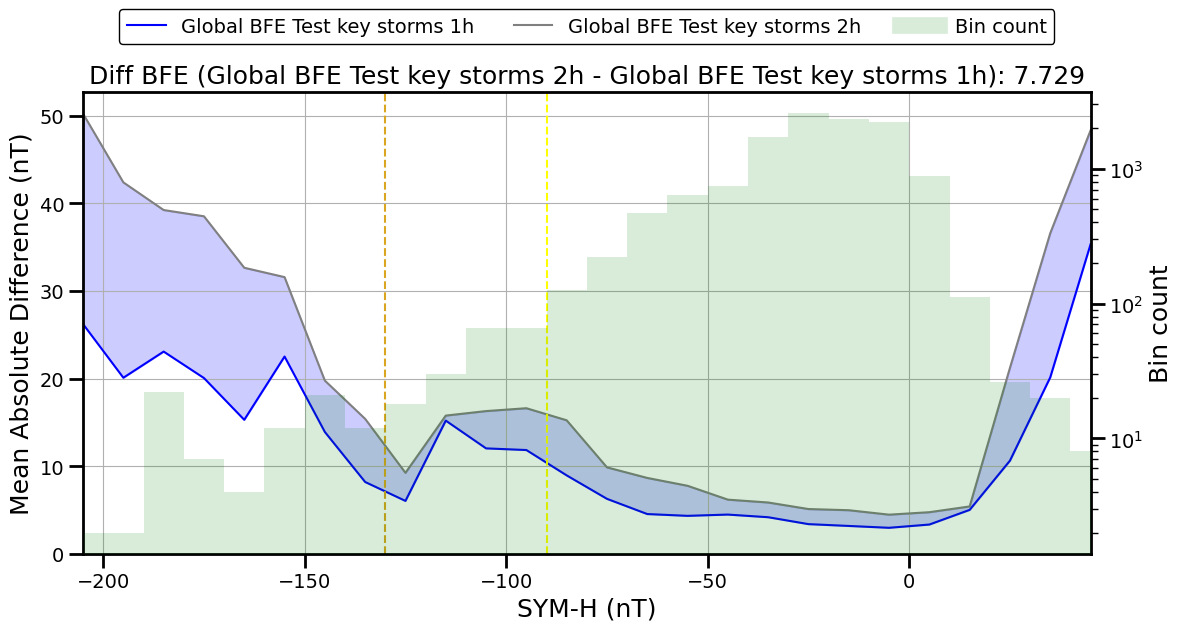

In [27]:
metrics.plot_comparison_bfe(
    df_global_1h_test_key_new[['SYM_H', 'mse_predicted_SYM_H']],
    df_global_2h_test_key_new[['SYM_H', 'mse_predicted_SYM_H']],
    title='Global BFE Test key storms 1h',
    title_to_compare='Global BFE Test key storms 2h',
    plot_sym_bars = True,
    xlabel_title = 'SYM-H (nT)',
);
plt.savefig(f'./figs/bfe-comparison-sym-h-1h-vs-2h-bfe-q-global-test-key.png', bbox_inches='tight', transparent = True)
plt.show();

## Supporting information plots
<a id='si-plots'>

In [28]:
base_dir = './figs'
output_dir = './figs_SI'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_patterns = {
    'forecast_1h': 'sym-h-1h-forecast-q-test-',
    'forecast_2h': 'sym-h-2h-forecast-q-test-',
    'BFE_1h': 'sym-h-1h-bfe-q-test-',
    'BFE_2h': 'sym-h-2h-bfe-q-test-',
    'interval_evaluation_1h': 'sym-h-1h-interval-evaluation-test-',
    'interval_evaluation_2h': 'sym-h-2h-interval-evaluation-test-'
}

global_test_paths = [
    ['sym-h-1h-bfe-q-global-test.png', 'sym-h-2h-bfe-q-global-test.png'],
    ['interval-evaluation-sym-h-1h-global-test.png', 'interval-evaluation-sym-h-2h-global-test.png'],
    ['bfe-comparison-sym-h-1h-vs-2h-bfe-q-global-test.png']
]

global_test_key_paths = [
    ['sym-h-1h-bfe-q-global-test-key.png', 'sym-h-2h-bfe-q-global-test-key.png'],
    ['interval-evaluation-sym-h-1h-global-test-key.png', 'interval-evaluation-sym-h-2h-global-test-key.png'],
    ['bfe-comparison-sym-h-1h-vs-2h-bfe-q-global-test-key.png']
]

all_global = [global_test_paths, global_test_key_paths]

def find_image_file(pattern, storm_number):
    for file in os.listdir(base_dir):
        if file.startswith(pattern) and file.endswith(f'{storm_number}.png'):
            return os.path.join(base_dir, file)
    return None

rows = ['forecast', 'BFE', 'interval_evaluation']
columns = ['1h', '2h']

# Create figures with 6 subplots 3 rows (forecast, BFE and interval evaluation) and 2 columns (1 and 2 hours ahead forecasts)
# for all the test and test key storms individually for the supporting information
    
for storm_index in range(81, 123):  
    fig, axs = plt.subplots(len(rows), len(columns), figsize=(13 * len(columns), 6 * len(rows)))

    for i, row in enumerate(rows):
        for j, col in enumerate(columns):
            img_path = find_image_file(file_patterns[f'{row}_{col}'], storm_index)
            if img_path:
                img = mpimg.imread(img_path)
                axs[i, j].imshow(img)
                axs[i, j].axis('off')

    plt.subplots_adjust(hspace=0.05, wspace=0.05, top=0.90)

    plt.savefig(f'{output_dir}/storm-{storm_index}.png', bbox_inches='tight', transparent=True)
    plt.close(fig)
    
rows = ['BFE', 'interval_evaluation']
columns = ['1h', '2h']
    
# Create a figure with 4 subplots, 2 rows (BFE and interval evaluation) and 2 columns (1 and 2 hours ahead forecasts)
# for all the global test and test key storms for the supporting information
    
for z,key in enumerate(['test', 'test_key']):
    height_ratios = [1, 1, 2]
    fig = plt.figure(figsize=(13 * len(columns), 6 * sum(height_ratios)))
    gs = gridspec.GridSpec(3, len(columns), figure=fig, height_ratios=height_ratios)

    # Create subplots for the first two rows with two columns each
    axes = []
    for r,row in enumerate(rows):
        row_axes = []
        for c,col in enumerate(columns):
            ax = fig.add_subplot(gs[r, c])
            row_axes.append(ax)
        axes.append(row_axes)

    # Add an extra row that spans across both columns and has double the height
    extra_ax = fig.add_subplot(gs[2, :])

    # Plotting examples
    for i, row in enumerate(rows):
        for j, col in enumerate(columns):
            img_path = os.path.join(base_dir, all_global[z][i][j])
            img = mpimg.imread(img_path)
            axes[i][j].imshow(img)
            axes[i][j].axis('off')            

    # Plot an image or anything on the extra row
    img_path = os.path.join(base_dir, all_global[z][2][0])
    img = mpimg.imread(img_path)
    extra_ax.imshow(img)  # Example image
    extra_ax.axis('off')

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.05, wspace=0.05, top=0.90)
    plt.savefig(f'{output_dir}/global-{key}.png', bbox_inches='tight', transparent=True)
    plt.close(fig)

In [29]:
shutil.make_archive(output_dir, 'zip', output_dir)

'/mnt/c/Users/Armando/Desktop/sym-h-confidence-intervals/figs_SI.zip'

In [30]:
shutil.make_archive('./figs', 'zip', './figs')

'/mnt/c/Users/Armando/Desktop/sym-h-confidence-intervals/figs.zip'